# ANÁLISIS DE DATOS 💻 - MITIC & MAKE IT REAL 🧑

# 🏥 Proyecto Final - Análisis de Datos Hospitalarios 🏥

---

**ESTUDIANTE: ADA NAREL NOGUERA SACHELARIDI**

**FECHA PRESENTACIÓN: 26/MARZO/2025**

**DATA UTILIZADO: HOSPITAL+PATIENT+RECORDS**

---
---

## 🗂️ Índice del Notebook

1. Introducción y objetivos
2. Definición del problema
3. Carga, limpieza y transformación de datos
4. Preguntas de negocio
5. Tabla de variables clave
6. Resumen ejecutivo
7. Análisis exploratorio (EDA)
8. Análisis temporal y geográfico
9. Modelado predictivo (regresión)
10. Conclusiones generales y Recomendaciones para el hospital
11. Dashboard Power BI (entrega complementaria)

---

## 🧭 Introducción
Este proyecto forma parte del Bootcamp de Análisis de Datos, y tiene como objetivo aplicar todos los conocimientos adquiridos durante el programa, integrando herramientas como Python, SQL y Power BI para resolver un problema del mundo real a partir de un conjunto de datos hospitalarios reales.

El dataset utilizado contiene información de pacientes, procedimientos médicos, aseguradoras, organizaciones médicas y encuentros hospitalarios. A través del análisis de estos datos, buscamos descubrir patrones, entender comportamientos, estimar costos y brindar recomendaciones accionables que puedan ayudar a optimizar la gestión hospitalaria, reducir gastos innecesarios y mejorar la atención al paciente.

Se realizó un proceso completo que incluye la limpieza de datos, análisis exploratorio (EDA), visualizaciones, análisis geográfico y temporal, modelado predictivo y recomendaciones basadas en evidencia.

---

## 🎯 Objetivo General

- ✅ Realizar un análisis integral del conjunto de datos hospitalarios utilizando herramientas de análisis de datos, con el fin de **identificar patrones en los costos médicos, evaluar el impacto de factores como aseguradoras, procedimientos y duración de los encuentros, y generar recomendaciones accionables para la mejora de la gestión hospitalaria.**

---

## 🎯 Objetivos Específicos

- ✅ Integrar y limpiar múltiples fuentes de datos hospitalarios de pacientes, procedimientos, aseguradoras y encuentros médicos.
- ✅ Explorar la distribución de variables clave como edad, duración de encuentros y costos médicos.
- ✅ Analizar la relación entre aseguradoras, tipo de encuentro y procedimientos con los costos hospitalarios.
- ✅ Identificar outliers, tendencias estacionales y diferencias geográficas relevantes.
- ✅ Construir un modelo de regresión para predecir el costo de un encuentro médico a partir de variables relevantes.
- ✅ Generar visualizaciones claras y efectivas que apoyen la narrativa del análisis.
- ✅ Formular recomendaciones estratégicas y operativas basadas en los hallazgos obtenidos.

---

## ❓ Definición del Problema

El hospital desea comprender cuáles son los principales factores que inciden en los **costos totales de los encuentros médicos**, identificar a los pacientes de alto costo, analizar el comportamiento de las aseguradoras y entender cómo varían los procedimientos y costos según tipo de encuentro, ubicación geográfica y duración.


---

## 💡 Preguntas de Negocio Abordadas

- ¿Cuál es la edad promedio de los pacientes del hospital?
- ¿Qué procedimientos generan los mayores costos?
- ¿Qué aseguradoras están asociadas a mayores gastos médicos?
- ¿Cómo se distribuyen los pacientes por ciudad y condado?
- ¿Cómo se comportan los costos y los encuentros a lo largo del tiempo?
- ¿Existe relación entre edad, duración y costo del encuentro?
- ¿Cuáles son los tipos de encuentro más frecuentes y costosos?
- ¿Se pueden predecir los costos médicos en base a variables conocidas?

---

## 🔎 Variables Clave del Análisis

| Variable | Descripción |
|----------|-------------|
| AGE | Edad del paciente |
| DURATION_DAYS | Duración del encuentro médico |
| TOTAL_CLAIM_COST | Costo total del encuentro |
| ENCOUNTERCLASS | Tipo de atención (emergencia, ambulatorio, etc.) |
| PAYER_NAME | Nombre de la aseguradora |
| ORGANIZATION_NAME | Nombre de la organización hospitalaria |
| REASONDESCRIPTION | Motivo clínico del encuentro |

---

## 📌 Resumen Ejecutivo

Este proyecto analiza datos hospitalarios reales para descubrir patrones en los **costos médicos, procedimientos, aseguradoras y regiones geográficas**. A través de herramientas como **Python, pandas, visualización y regresión lineal**, se llevó a cabo una limpieza, análisis exploratorio, modelado y recomendaciones finales.

Los hallazgos revelan que los **costos están altamente influenciados por el tipo de encuentro, la aseguradora y ciertos procedimientos específicos**. Además, se identificaron zonas con mayor concentración de pacientes y se brindaron recomendaciones para optimizar los recursos y el control financiero del hospital.

---



#**✅ IMPORTAR LIBRERIAS NECESARIAS**


In [80]:
# Cargar Librerías Necesarias

import pandas as pd
import numpy as np
import io
import re
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import OLSInfluence
from google.colab import files


# **✅ CARGA Y DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS**

In [81]:
# Cargar los archivos
from google.colab import files
uploaded = files.upload()

# Leer los archivos CSV
df_patients = pd.read_csv(io.BytesIO(uploaded['patients.csv']))
df_encounters = pd.read_csv(io.BytesIO(uploaded['encounters.csv']))
df_procedures = pd.read_csv(io.BytesIO(uploaded['procedures.csv']))
df_payers = pd.read_csv(io.BytesIO(uploaded['payers.csv']))
df_organizations = pd.read_csv(io.BytesIO(uploaded['organizations.csv']))
df_dictionary = pd.read_csv(io.BytesIO(uploaded['data_dictionary.csv']))

# Verificar que los DataFrames se han cargado correctamente
print("Pacientes:")
print(df_patients.head())

print("\nEncuentros:")
print(df_encounters.head())

print("\nProcedimientos:")
print(df_procedures.head())

print("\nAseguradoras:")
print(df_payers.head())

print("\nOrganizaciones:")
print(df_organizations.head())

print("\nDiccionario de Datos:")
print(df_dictionary.head())

Saving data_dictionary.csv to data_dictionary.csv
Saving encounters.csv to encounters.csv
Saving organizations.csv to organizations.csv
Saving patients.csv to patients.csv
Saving payers.csv to payers.csv
Saving procedures.csv to procedures.csv
Pacientes:
                                     Id   BIRTHDATE   DEATHDATE PREFIX  \
0  5605b66b-e92d-c16c-1b83-b8bf7040d51f  1977-03-19         NaN   Mrs.   
1  6e5ae27c-8038-7988-e2c0-25a103f01bfa  1940-02-19         NaN    Mr.   
2  8123d076-0886-9007-e956-d5864aa121a7  1958-06-04         NaN    Mr.   
3  770518e4-6133-648e-60c9-071eb2f0e2ce  1928-12-25  2017-09-29    Mr.   
4  f96addf5-81b9-0aab-7855-d208d3d352c5  1928-12-25  2014-02-23    Mr.   

       FIRST           LAST SUFFIX     MAIDEN MARITAL   RACE    ETHNICITY  \
0  Nikita578      Erdman779    NaN  Leannon79       M  white  nonhispanic   
1    Zane918  Hodkiewicz467    NaN        NaN       M  white  nonhispanic   
2   Quinn173   Marquardt819    NaN        NaN       M  white  nonhisp

In [82]:
# Inspección Inicial

# Mostrar información general y las primeras filas de cada DataFrame
DataFrame = {
    "Data Dictionary": df_dictionary,
    "Encounters": df_encounters,
    "Organizations": df_organizations,
    "Patients": df_patients,
    "Payers": df_payers,
    "Procedures": df_procedures,
}

for name, df in DataFrame.items():
    print(f"DataFrame: {name}")
    print("Información general:")
    df.info()  # Muestra información general del DataFrame

    print("\nPrimeras filas:")
    print(df.head())  # Muestra las primeras 5 filas del DataFrame

    print("\nEstadísticas descriptivas:")
    print(df.describe())  # Estadísticas de columnas numéricas

    print("\nValores nulos por columna:")
    print(df.isnull().sum())  # Conteo de valores nulos

    print("\nValores únicos por columna categórica:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"{col}: {df[col].nunique()} valores únicos")

    print("\n" + "="*50 + "\n")  # Separador visual entre DataFrame

DataFrame: Data Dictionary
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        65 non-null     object
 1   Field        60 non-null     object
 2   Description  65 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB

Primeras filas:
        Table    Field                                        Description
0  encounters      NaN                             Patient encounter data
1  encounters       Id   Primary Key. Unique Identifier of the encounter.
2  encounters    Start  The date and time (iso8601 UTC Date (yyyy-MM-d...
3  encounters     Stop  The date and time (iso8601 UTC Date (yyyy-MM-d...
4  encounters  Patient                        Foreign key to the Patient.

Estadísticas descriptivas:
           Table Field                  Description
count         65    60                           65
unique      

# 📂 Conclusiones de la inspección inicial

Como parte del proceso de análisis, se realizó una inspección inicial de los DataFrames cargados para entender su estructura, calidad y características. A continuación, se resumen los hallazgos clave:

  ⭐ **1.	Data Dictionary (Diccionario de Datos):** Este DataFrame contiene metadatos sobre las tablas y campos en la base de datos. Se identificaron 5 tablas únicas y 60 descripciones únicas. Sin embargo, la columna `Field` tiene 5 valores nulos, lo que podría indicar que algunas tablas no tienen campos asociados.


   ⭐ **2.	Encounters (Encuentros Médicos):** Contiene información sobre 27,891 encuentros médicos. Se observó que las columnas `REASONCODE` y `REASONDESCRIPTION` tienen muchos valores nulos (19,541), lo que podría limitar el análisis de los motivos de los encuentros. Además, la columna `TOTAL_CLAIM_COST` presenta valores extremos que requieren investigación.


  ⭐ **3.	Organizations (Organizaciones):** Solo 1 registro, lo que sugiere que todos los pacientes pertenecen a la misma organización médica (Massachusetts General Hospital).


  ⭐ **4.	Patients (Pacientes):** Contiene información demográfica de 974 pacientes. Se identificaron valores nulos en columnas como `DEATHDATE`, `SUFFIX`, `MAIDEN`, y `ZIP`. La columna `ZIP` requiere imputación para análisis de ubicación.


  ⭐ **5.	Payers (Pagadores):** Hay 10 aseguradoras únicas, pero algunas columnas como `ADDRESS` y `PHONE` tienen valores nulos.


  ⭐ **6.	Procedures (Procedimientos Médicos):** Contiene 47,701 procedimientos médicos. Las columnas `REASONCODE` y `REASONDESCRIPTION` tienen muchos valores nulos (36,945), y `BASE_COST` presenta valores extremos.


# **✅ LIMPIEZA DE DATOS**

In [83]:
# Configuración de logging
logging.basicConfig(filename='data_cleaning.log', level=logging.INFO)
logging.info("Iniciando proceso de limpieza de datos...")

In [84]:
# Función para convertir fechas en un DataFrame
def convertir_fechas(df, columnas_fecha):
    """
    Convierte las columnas especificadas a tipo datetime.
    """
    for col in columnas_fecha:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            logging.info(f"Columna '{col}' convertida a datetime.")
        except Exception as e:
            logging.error(f"Error al convertir la columna '{col}': {e}")
    return df

# Aplicar la conversión de fechas a los DataFrames correspondientes
df_patients = convertir_fechas(df_patients, ['BIRTHDATE','DEATHDATE'])
df_encounters = convertir_fechas(df_encounters, ['START', 'STOP'])
df_procedures = convertir_fechas(df_procedures, ['START', 'STOP'])


In [85]:
# Revisar valores nulos en cada DataFrame

print("\nRevisión de Valores Nulos y Porcentajes:")
for nombre, df in DataFrame.items():
    print(f"\nDataFrame: {nombre}")
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100
    null_info = pd.DataFrame({'Valores Nulos': null_counts, 'Porcentaje': null_percentages})
    print(null_info)
    print("-" * 50)  # Separador visual



Revisión de Valores Nulos y Porcentajes:

DataFrame: Data Dictionary
             Valores Nulos  Porcentaje
Table                    0    0.000000
Field                    5    7.692308
Description              0    0.000000
--------------------------------------------------

DataFrame: Encounters
                     Valores Nulos  Porcentaje
Id                               0    0.000000
START                            0    0.000000
STOP                             0    0.000000
PATIENT                          0    0.000000
ORGANIZATION                     0    0.000000
PAYER                            0    0.000000
ENCOUNTERCLASS                   0    0.000000
CODE                             0    0.000000
DESCRIPTION                      0    0.000000
BASE_ENCOUNTER_COST              0    0.000000
TOTAL_CLAIM_COST                 0    0.000000
PAYER_COVERAGE                   0    0.000000
REASONCODE                   19541   70.062027
REASONDESCRIPTION            19541   70.06

*# Manejo de valores nulos*

In [86]:
# Análisis de valores faltantes en REASONCODE y REASONDESCRIPTION en el DataFrame df_encounters


# PASO1: Cantidad y porcentaje de nulos

null_reasoncode = df_encounters['REASONCODE'].isnull().sum()
null_reasondesc = df_encounters['REASONDESCRIPTION'].isnull().sum()

print(f"Valores nulos en REASONCODE: {null_reasoncode} ({null_reasoncode/len(df_encounters)*100:.2f}%)")
print(f"Valores nulos en REASONDESCRIPTION: {null_reasondesc} ({null_reasondesc/len(df_encounters)*100:.2f}%)")


# PASO2: ¿Se concentran en ciertos tipos de encuentro?

missing_reason_by_class = df_encounters[df_encounters['REASONCODE'].isnull()]['ENCOUNTERCLASS'].value_counts(normalize=True)
print("\nDistribución de encuentros con REASONCODE nulo por tipo de ENCOUNTERCLASS:")
print(missing_reason_by_class)


# PASO3: ¿Hay patrones por aseguradora?

missing_reason_by_payer = df_encounters[df_encounters['REASONCODE'].isnull()]['PAYER'].value_counts(normalize=True).head(5)
print("\nDistribución de REASONCODE nulo por aseguradora:")
print(missing_reason_by_payer)


# PASO4: ¿Hay patrones por año?

df_encounters['YEAR'] = pd.to_datetime(df_encounters['START'], errors='coerce').dt.year
missing_reason_by_year = df_encounters[df_encounters['REASONCODE'].isnull()]['YEAR'].value_counts().sort_index()
print("\nDistribución de REASONCODE nulo por año:")
print(missing_reason_by_year)


# PASO5: Reemplazamos los valores nulos por una etiqueta explícita

df_encounters['REASONCODE'] = df_encounters['REASONCODE'].fillna("NO ESPECIFICADO")
df_encounters['REASONDESCRIPTION'] = df_encounters['REASONDESCRIPTION'].fillna("NO ESPECIFICADO")

logging.basicConfig(level=logging.INFO)  # registrar este paso en logging:
logging.info("REASONCODE y REASONDESCRIPTION con valores nulos reemplazados por 'NO ESPECIFICADO' debido a su uso como subespecialidad opcional.")


# PASO6: Verificar valores nulos después de la limpieza

print("\nValores Nulos después de Limpieza:")
print(df_encounters.isnull().sum())


Valores nulos en REASONCODE: 19541 (70.06%)
Valores nulos en REASONDESCRIPTION: 19541 (70.06%)

Distribución de encuentros con REASONCODE nulo por tipo de ENCOUNTERCLASS:
ENCOUNTERCLASS
outpatient    0.321017
ambulatory    0.260376
urgentcare    0.187606
emergency     0.102963
wellness      0.096208
inpatient     0.031831
Name: proportion, dtype: float64

Distribución de REASONCODE nulo por aseguradora:
PAYER
7caa7254-5050-3b5e-9eae-bd5ea30e809c    0.422701
b1c428d6-4f07-31e0-90f0-68ffa6ff8c76    0.338007
7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a    0.037460
d47b3510-2895-3b70-9897-342d681c769d    0.035055
4d71f845-a6a9-3c39-b242-14d25ef86a8d    0.032598
Name: proportion, dtype: float64

Distribución de REASONCODE nulo por año:
YEAR
2011     790
2012    1458
2013    1616
2014    3020
2015    1695
2016    1753
2017    1609
2018    1589
2019    1644
2020    1584
2021    2654
2022     129
Name: count, dtype: int64

Valores Nulos después de Limpieza:
Id                     0
START              

In [87]:
# Análisis de valores faltantes en REASONCODE y REASONDESCRIPTION en el DataFrame df_procedures


# PASO1: Cantidad y porcentaje de nulos

null_reasoncode = df_procedures['REASONCODE'].isnull().sum()
null_reasondesc = df_procedures['REASONDESCRIPTION'].isnull().sum()

print(f"Valores nulos en REASONCODE: {null_reasoncode} ({null_reasoncode/len(df_procedures)*100:.2f}%)")
print(f"Valores nulos en REASONDESCRIPTION: {null_reasondesc} ({null_reasondesc/len(df_procedures)*100:.2f}%)")


# PASO2: ¿Se concentran en ciertos tipos de procedimiento?

missing_reason_by_type = df_procedures[df_procedures['REASONCODE'].isnull()]['CODE'].value_counts(normalize=True)
print("\nDistribución de procedimientos con REASONCODE nulo por tipo de código:")
print(missing_reason_by_type)


# PASO3: ¿Hay patrones por encuentro?

missing_reason_by_encounter = df_procedures[df_procedures['REASONCODE'].isnull()]['ENCOUNTER'].value_counts(normalize=True).head(5)
print("\nDistribución de REASONCODE nulo por encuentro:")
print(missing_reason_by_encounter)


# PASO4: ¿Hay patrones por año?

df_procedures['YEAR'] = pd.to_datetime(df_procedures['START'], errors='coerce').dt.year
missing_reason_by_year = df_procedures[df_procedures['REASONCODE'].isnull()]['YEAR'].value_counts().sort_index()
print("\nDistribución de REASONCODE nulo por año:")
print(missing_reason_by_year)


# PASO5: Reemplazar los valores nulos por una etiqueta explícita

df_procedures['REASONCODE'] = df_procedures['REASONCODE'].fillna("NO ESPECIFICADO")
df_procedures['REASONDESCRIPTION'] = df_procedures['REASONDESCRIPTION'].fillna("NO ESPECIFICADO")


# Registrar este paso en logging

logging.basicConfig(level=logging.INFO)
logging.info("REASONCODE y REASONDESCRIPTION con valores nulos reemplazados por 'NO ESPECIFICADO' en df_procedures.")


# PASO6: Verificar valores nulos después de la limpieza

print("\nValores Nulos después de Limpieza en df_procedures:")
print(df_procedures.isnull().sum())


Valores nulos en REASONCODE: 36945 (77.45%)
Valores nulos en REASONDESCRIPTION: 36945 (77.45%)

Distribución de procedimientos con REASONCODE nulo por tipo de código:
CODE
710824005          0.124401
385763009          0.110922
171207006          0.101042
454711000124102    0.097821
428211000124100    0.078657
                     ...   
395142003          0.000027
112790001          0.000027
385892002          0.000027
236931002          0.000027
61594008           0.000027
Name: proportion, Length: 66, dtype: float64

Distribución de REASONCODE nulo por encuentro:
ENCOUNTER
66b2ab44-a2cc-8053-8f4e-c5be57e50cc4    0.005035
e995e5e9-5130-abad-9247-6b83858fe3f5    0.004872
534c59b6-2b18-28b7-a276-97de5576738e    0.004547
eb6f44a2-c321-fa31-8d31-171794271e11    0.003844
353167e8-5e65-4fd8-e0a8-acce8d2812bd    0.003573
Name: proportion, dtype: float64

Distribución de REASONCODE nulo por año:
YEAR
2011     982
2012    3440
2013    3888
2014    5064
2015    3493
2016    3336
2017    3427
2

In [88]:
# Análisis de valores faltantes en el DataFrame df_patients

# Limpieza de la columna ZIP
df_patients['ZIP'] = df_patients['ZIP'].fillna("UNKNOWN")

# Limpieza de la columna MARITAL
if df_patients['MARITAL'].dtype == 'object':  # Si es categórica
    df_patients['MARITAL'] = df_patients['MARITAL'].fillna(df_patients['MARITAL'].mode()[0])  # Usar la moda

# Limpieza de la columna SUFFIX
df_patients['SUFFIX'] = df_patients['SUFFIX'].fillna("NO SUFFIX")

# Limpieza de la columna MAIDEN
df_patients['MAIDEN'] = df_patients['MAIDEN'].fillna("UNKNOWN")

# Verificar valores nulos después de la limpieza
print("\nValores Nulos después de Limpieza:")
print(df_patients[['ZIP', 'MARITAL', 'SUFFIX', 'MAIDEN']].isnull().sum())



Valores Nulos después de Limpieza:
ZIP        0
MARITAL    0
SUFFIX     0
MAIDEN     0
dtype: int64


In [89]:
# Análisis de valores faltantes en el DataFramen df_payers

# Reemplazar todos los valores faltantes con "UNKNOWN" en todas las columnas
df_payers = df_payers.fillna("UNKNOWN")

# Verificar valores nulos después de la limpieza
print("\nValores Nulos después de Limpieza:")
print(df_payers.isnull().sum())



Valores Nulos después de Limpieza:
Id                     0
NAME                   0
ADDRESS                0
CITY                   0
STATE_HEADQUARTERED    0
ZIP                    0
PHONE                  0
dtype: int64


In [90]:
# Análisis de valores faltantes en el DataFrame df_dicctionary

# Completar valores nulos en la columna FIELD con "UNKNOWN"
df_dictionary['Field'] = df_dictionary['Field'].fillna("UNKNOWN")

# Verificar valores nulos después de la limpieza
print("\nValores Nulos después de Limpieza en la columna FIELD:")
print(df_dictionary['Field'].isnull().sum())



Valores Nulos después de Limpieza en la columna FIELD:
0


# ✋✋✋ *Manejo de Valores Nulos* ✋✋✋

Para garantizar la integridad de los datos, se implementaron estrategias específicas para manejar los valores nulos en cada DataFrame:


  **⭐ 1.	En el DataFrame `df_encounters`:**

*   Durante la inspección del dataset `df_encounters`, se detectó que aproximadamente el **70% de los registros** presentaban valores nulos en las columnas `REASONCODE` y `REASONDESCRIPTION`. Estas columnas están diseñadas para capturar el **motivo específico o subespecialidad clínica** de un encuentro médico (por ejemplo: dentro de un encuentro ambulatorio general, se podría especificar si se trató de cardiología, dermatología, etc.). Tras un análisis más profundo, se observó que:
    - Los valores faltantes **no siguen un patrón errático**, sino que son **consistentes entre distintos años y aseguradoras**.
    - Los registros sin motivo específico se asocian mayoritariamente a tipos de encuentro más generales como `outpatient`, `ambulatory` y `urgentcare`.
    - Las columnas parecen actuar como **campos opcionales**, utilizados únicamente si la especialidad clínica se subdivide en motivos específicos.

  Dado que:
    - Los nulos reflejan de forma fidedigna la estructura de especialidades del sistema hospitalario,
    - No existe una forma estadísticamente confiable de imputarlos sin inducir sesgo,

  **Se optó por mantener los valores nulos, reemplazándolos explícitamente por la categoría `"NO ESPECIFICADO"`** para permitir su uso en visualizaciones, sin alterar el significado original de los datos. Esta decisión asegura la **integridad del análisis** y permite interpretar correctamente la ausencia de datos como parte natural del diseño del sistema clínico y no como error.


  **⭐ 2.	En el DataFrame `df_procedures`:**

*   Durante la inspección del dataset `df_procedures`, se detectó que aproximadamente el **77.45% **de los registros presentaban valores nulos en las columnas `REASONCODE` y `REASONDESCRIPTION`.  **Se optó por mantener los valores nulos, reemplazándolos explícitamente por la categoría `"NO ESPECIFICADO"`** para permitir su uso en visualizaciones, sin alterar el significado original de los datos. Esta decisión asegura la **integridad del análisis** y permite interpretar correctamente la ausencia de datos como parte natural del diseño del sistema clínico y no como error.


  **⭐ 3.	En el DataFrame `df_patients`:**

*   Durante la inspección del DataFrame `df_patients`, se identificaron valores faltantes en varias columnas clave: `ZIP`, `MARITAL`, `SUFFIX` y `MAIDEN`. Estas columnas contienen información importante sobre los pacientes, como su código postal, estado civil, sufijo (por ejemplo, "JD", "MD", "PhD") y apellido de soltera. Tras un análisis detallado, se observó que:
 - ***Columna `ZIP`:*** Contiene códigos postales de los pacientes. Los valores nulos en esta columna representan casos en los que el código postal no estaba disponible. Dado que los códigos postales son datos estructurados y no pueden imputarse de manera confiable, se decidió reemplazar los valores nulos con la etiqueta "UNKNOWN".

  - ***Columna `MARITAL`:*** Contiene el estado civil de los pacientes (por ejemplo, "M" para casado, "S" para soltero). Los valores nulos en esta columna representan casos en los que el estado civil no estaba registrado. Dado que es una columna categórica, se optó por reemplazar los valores nulos con la moda (el valor más frecuente), que en este caso es el estado civil más común entre los pacientes.

  - ***Columna `SUFFIX`:*** Contiene sufijos como "JD", "MD" o "PhD". Los valores nulos en esta columna representan casos en los que el paciente no tiene un sufijo registrado. Se decidió reemplazar los valores nulos con la etiqueta "NO SUFFIX" para indicar explícitamente la ausencia de un sufijo.

  - ***Columna `MAIDEN`:*** Contiene el apellido de soltera de los pacientes. Los valores nulos en esta columna representan casos en los que el apellido de soltera no estaba disponible o no aplica. Se optó por reemplazar los valores nulos con la etiqueta "UNKNOWN" para mantener la consistencia con otras columnas.



  **⭐ 4.	En el DataFrame `df_payers`:**

*   Todas las columnas numéricas y  no numéricas con datos faltantes se completaron con "UNKNOWN" para mantener la claridad y consistencia en los datos.


  **⭐ 5.	En el DataFrame `df_dictionary`:**

* Se optó por reemplazar los valores nulos en la columna `FIELD` con la etiqueta "UNKNOWN"

**Resultados Obtenidos:**

*   Después de la limpieza, no quedan valores nulos en los DataFrame `df_encounters`, `df_procedures`, `df_patients`, `df_payers` y `df_dictionary`.
*   Estas estrategias aseguran que los datos estén listos para su análisis sin perder información crítica.


In [91]:
# Validación de valores únicos

for nombre, df in DataFrame.items():
    print(f"\nDataFrame: {nombre}")
    for col in df.columns:
        if 'Id' in col or 'ID' in col:
            if df[col].nunique() == len(df):
                print(f"Columna '{col}' tiene valores únicos.")
            else:
                print(f"Columna '{col}' tiene duplicados.")



DataFrame: Data Dictionary

DataFrame: Encounters
Columna 'Id' tiene valores únicos.

DataFrame: Organizations
Columna 'Id' tiene valores únicos.

DataFrame: Patients
Columna 'Id' tiene valores únicos.
Columna 'MAIDEN' tiene duplicados.

DataFrame: Payers
Columna 'Id' tiene valores únicos.

DataFrame: Procedures


In [92]:
# Función para normalizar texto

def normalizar_texto(columna):
    return columna.str.strip().str.upper()

# PASO1: Diccionario que mapea nombres de DataFrames a los objetos DataFrame
dataframes = {
    'df_encounters': df_encounters,
    'df_patients': df_patients,
    'df_payers': df_payers,
    'df_procedures': df_procedures
}

# PASO2: Diccionario con los nombres de los DataFrames y sus columnas a normalizar
dataframes_a_normalizar = {
    'df_encounters': ['ENCOUNTERCLASS', 'DESCRIPTION', 'REASONDESCRIPTION'],
    'df_patients': ['PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY'],
    'df_payers': ['NAME', 'ADDRESS', 'CITY', 'STATE_HEADQUARTERED'],
    'df_procedures': ['DESCRIPTION', 'REASONDESCRIPTION']
}

# PASO3: Aplicar la normalización a cada DataFrame y sus columnas
for df_name, columnas in dataframes_a_normalizar.items():
    df = dataframes[df_name]  # Obtener el DataFrame real
    for columna in columnas:
        df[columna] = normalizar_texto(df[columna])

# PASO4: Verificar los cambios
print("Normalización completada.")


Normalización completada.


In [93]:
# Función para normalizar texto (eliminar espacios, convertir a mayúsculas y filtrar solo letras)

def normalizar_texto(columna):
    columna = columna.str.strip().str.upper()  # Eliminar espacios y convertir a mayúsculas
    columna = columna.apply(lambda x: re.sub(r'[^A-ZÁÉÍÓÚÜÑ\s\'-]', '', x))  # Eliminar caracteres no deseados
    return columna

# PASO1: Diccionario que mapea nombres de DataFrames a los objetos DataFrame
dataframes = {
    'df_patients': df_patients
}

# PASO2: Diccionario con los nombres de los DataFrames y sus columnas a normalizar
dataframes_a_normalizar = {
    'df_patients': ['FIRST', 'LAST', 'MAIDEN']  # Columnas a normalizar en df_patients
}

# PASO3: Aplicar la normalización a cada DataFrame y sus columnas
for df_name, columnas in dataframes_a_normalizar.items():
    df = dataframes[df_name]  # Obtener el DataFrame real
    for columna in columnas:
        df[columna] = normalizar_texto(df[columna])

# PASO4: Verificar el resultado
print(df_patients[['FIRST', 'LAST', 'MAIDEN']].head())


    FIRST        LAST   MAIDEN
0  NIKITA      ERDMAN  LEANNON
1    ZANE  HODKIEWICZ  UNKNOWN
2   QUINN   MARQUARDT  UNKNOWN
3    ABEL     SMITHAM  UNKNOWN
4   EDWIN     LABADIE  UNKNOWN


In [94]:
# Revisión de rangos y valores atípicos

print("\nRevisión de Rangos y Valores Atípicos:")
for nombre, df in DataFrame.items():
    print(f"\nDataFrame: {nombre}")
    print(df.describe())



Revisión de Rangos y Valores Atípicos:

DataFrame: Data Dictionary
           Table    Field                  Description
count         65       65                           65
unique         5       41                           60
top     patients  UNKNOWN  Foreign key to the Patient.
freq          23        5                            2

DataFrame: Encounters
               CODE  BASE_ENCOUNTER_COST  TOTAL_CLAIM_COST  PAYER_COVERAGE  \
count  2.789100e+04         27891.000000      27891.000000    27891.000000   
mean   2.972670e+08           116.181614       3639.682174     1114.965652   
std    2.017839e+08            28.410082       9205.595748     4768.615576   
min    1.505002e+06            85.550000          0.000000        0.000000   
25%    1.853450e+08            85.550000        142.580000        0.000000   
50%    1.853490e+08           136.800000        278.580000       28.440000   
75%    4.244410e+08           142.580000       1412.530000      155.770000   
max    7.0

*# Manejo de valores atípicos*

In [95]:
# Implementación del método IQR -- (TRATAMIENTO PARA VALORES ATIPICOS IDENTIFICADOS EN EL DATAFRAME DF_ENCOUNTERS)


##PASO1: Calcular los cuartiles y el IQR

# Calcular Q1, Q3 e IQR para TOTAL_CLAIM_COST
Q1_total_claim = df_encounters['TOTAL_CLAIM_COST'].quantile(0.25)
Q3_total_claim = df_encounters['TOTAL_CLAIM_COST'].quantile(0.75)
IQR_total_claim = Q3_total_claim - Q1_total_claim

# Calcular Q1, Q3 e IQR para PAYER_COVERAGE
Q1_payer_coverage = df_encounters['PAYER_COVERAGE'].quantile(0.25)
Q3_payer_coverage = df_encounters['PAYER_COVERAGE'].quantile(0.75)
IQR_payer_coverage = Q3_payer_coverage - Q1_payer_coverage



##PASO2: Definir los límites

# Límites para TOTAL_CLAIM_COST
limite_inferior_total_claim = Q1_total_claim - 1.5 * IQR_total_claim
limite_superior_total_claim = Q3_total_claim + 1.5 * IQR_total_claim

# Límites para PAYER_COVERAGE
limite_inferior_payer_coverage = Q1_payer_coverage - 1.5 * IQR_payer_coverage
limite_superior_payer_coverage = Q3_payer_coverage + 1.5 * IQR_payer_coverage


##PASO3: Identificar valores atípicos

# Valores atípicos en TOTAL_CLAIM_COST
outliers_total_claim = df_encounters[
    (df_encounters['TOTAL_CLAIM_COST'] < limite_inferior_total_claim) |
    (df_encounters['TOTAL_CLAIM_COST'] > limite_superior_total_claim)
]

# Valores atípicos en PAYER_COVERAGE
outliers_payer_coverage = df_encounters[
    (df_encounters['PAYER_COVERAGE'] < limite_inferior_payer_coverage) |
    (df_encounters['PAYER_COVERAGE'] > limite_superior_payer_coverage)
]


##PASO4: Tratamiento de valores atípicos identificados

# Imputar valores atípicos en TOTAL_CLAIM_COST con la mediana
mediana_total_claim = df_encounters['TOTAL_CLAIM_COST'].median()
df_encounters['TOTAL_CLAIM_COST'] = df_encounters['TOTAL_CLAIM_COST'].apply(
    lambda x: mediana_total_claim if x < limite_inferior_total_claim or x > limite_superior_total_claim else x
)

# Imputar valores atípicos en PAYER_COVERAGE con la mediana
mediana_payer_coverage = df_encounters['PAYER_COVERAGE'].median()
df_encounters['PAYER_COVERAGE'] = df_encounters['PAYER_COVERAGE'].apply(
    lambda x: mediana_payer_coverage if x < limite_inferior_payer_coverage or x > limite_superior_payer_coverage else x
)


##PASO5: Verificación después del tratamiento

print("\nResumen después del tratamiento de valores atípicos:")
print(df_encounters[['TOTAL_CLAIM_COST', 'PAYER_COVERAGE']].describe())



Resumen después del tratamiento de valores atípicos:
       TOTAL_CLAIM_COST  PAYER_COVERAGE
count      27891.000000    27891.000000
mean         449.038312       40.930983
std          510.190490       63.211408
min            0.000000        0.000000
25%          142.580000        0.000000
50%          278.580000       28.440000
75%          573.980000       54.440000
max         3311.150000      388.620000


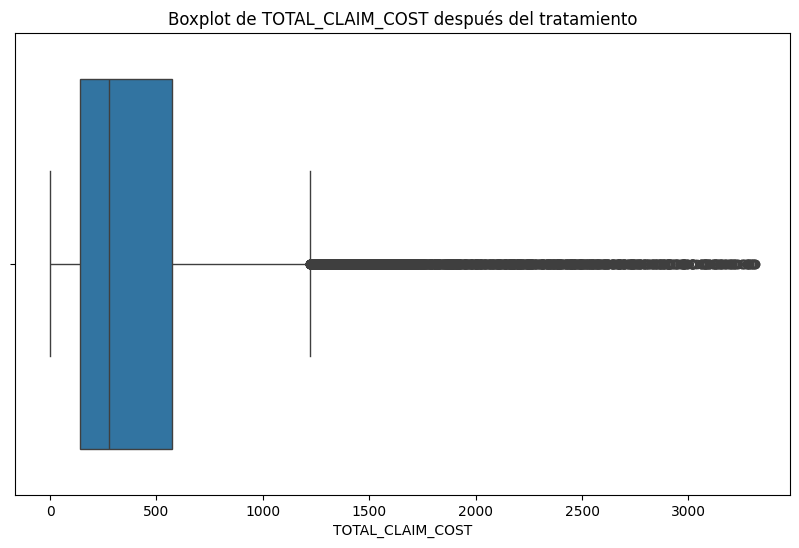

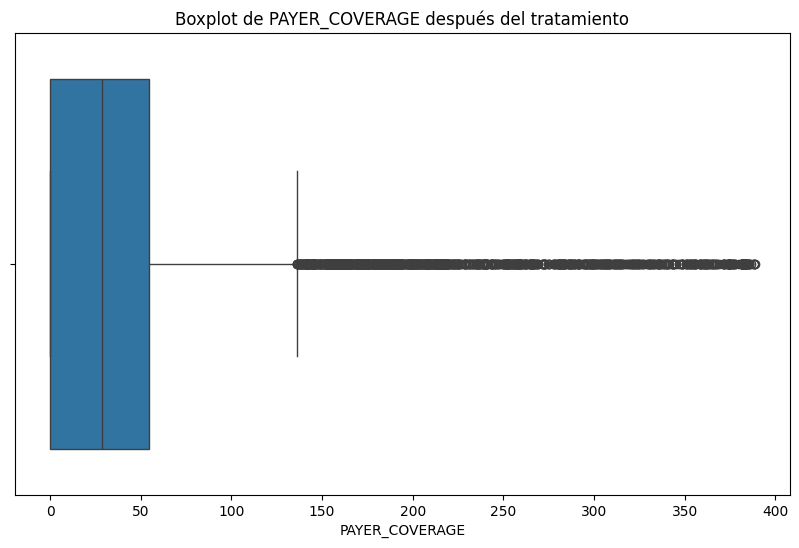

In [96]:
##PASO6: Visualización de los datos

# Gráfico de caja para TOTAL_CLAIM_COST
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encounters['TOTAL_CLAIM_COST'])
plt.title('Boxplot de TOTAL_CLAIM_COST después del tratamiento')
plt.show()

# Gráfico de caja para PAYER_COVERAGE
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encounters['PAYER_COVERAGE'])
plt.title('Boxplot de PAYER_COVERAGE después del tratamiento')
plt.show()



Resumen después del tratamiento de valores atípicos:
count    47701.000000
mean       491.672187
std        228.412561
min          1.000000
25%        431.000000
50%        431.000000
75%        431.000000
max       1768.000000
Name: BASE_COST, dtype: float64


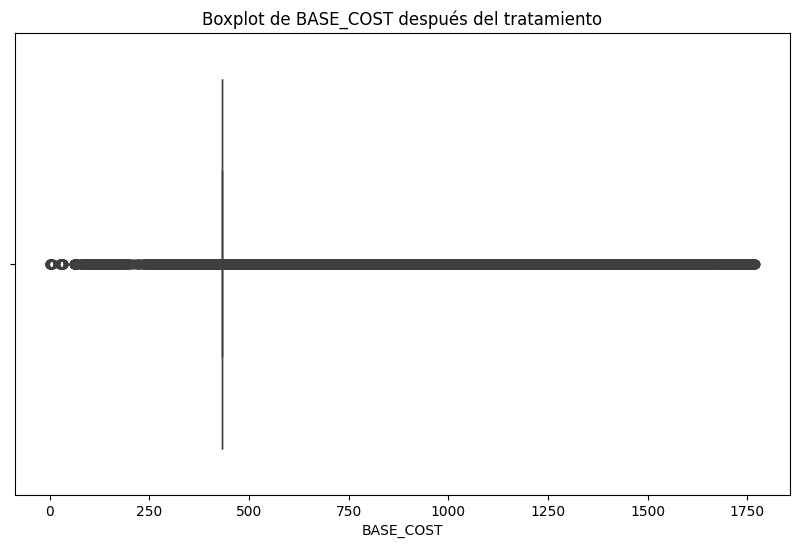

In [97]:
# Implementación del método IQR -- (TRATAMIENTO PARA VALORES ATIPICOS IDENTIFICADOS EN EL DATAFRAME DF_PROCEDURES)

##PASO1: Calcular Q1, Q3 e IQR

Q1_base_cost = df_procedures['BASE_COST'].quantile(0.25)
Q3_base_cost = df_procedures['BASE_COST'].quantile(0.75)
IQR_base_cost = Q3_base_cost - Q1_base_cost


##PASO2: Definir los límites

limite_inferior_base_cost = Q1_base_cost - 1.5 * IQR_base_cost
limite_superior_base_cost = Q3_base_cost + 1.5 * IQR_base_cost


##PASO3: Imputar valores atípicos con la mediana

mediana_base_cost = df_procedures['BASE_COST'].median()
df_procedures['BASE_COST'] = df_procedures['BASE_COST'].apply(
    lambda x: mediana_base_cost if x < limite_inferior_base_cost or x > limite_superior_base_cost else x
)


##PASO4: Verificación de los resultados

print("\nResumen después del tratamiento de valores atípicos:")
print(df_procedures['BASE_COST'].describe())


##PASO5: Visualización de los datos

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_procedures['BASE_COST'])
plt.title('Boxplot de BASE_COST después del tratamiento')
plt.show()


# ✋✋✋ *Manejo de Valores Atípicos* ✋✋✋

Para garantizar la integridad de los datos, se implementaron estrategias específicas para manejar los valores atípicos en cada DataFrame:

  **⭐ 1.  En el DataFrame `df_encounters`:**

Se detectó la presencia de valores atípicos en las siguientes columnas del DataFrame df_encounters:

  *	**`TOTAL_CLAIM_COST`:** Costo total de la reclamación por un Valor máximo extremadamente alto: **641,882.70**.

  *	**`PAYER_COVERAGE`:** Cobertura del asegurador por un Valor máximo muy alto: **247,751.42**.

  * Estos valores atípicos podrían distorsionar los análisis estadísticos y los modelos predictivos, por lo que se decidió aplicar una técnica para identificarlos y manejarlos adecuadamente.

  * Se utilizó el **método del rango intercuartílico (IQR)** para detectar y tratar los valores atípicos. Este método es robusto y ampliamente utilizado en la limpieza de datos.

  *	Se optó por **imputar los valores atípicos con la mediana**, ya que esta estrategia permite mantener la integridad de los datos sin eliminarlos completamente. La mediana es una medida robusta que no se ve afectada por valores extremos.


  **⭐ 2.  En el DataFrame ` df_procedures `:**

Se detectó la presencia de valores atípicos en la columna BASE_COST del DataFrame df_procedures:

  *	**`BASE_COST`:** Costo base del procedimiento por un Valor máximo extremadamente alto: **289,531.00**.

  *	Estos valores atípicos podrían distorsionar los análisis estadísticos y los modelos predictivos, por lo que se decidió aplicar una técnica para identificarlos y manejarlos adecuadamente.

  *	Se utilizó el **método del rango intercuartílico (IQR)** para detectar y tratar los valores atípicos.

  * Se optó por **imputar los valores atípicos con la mediana**, ya que esta estrategia permite mantener la integridad de los datos sin eliminarlos completamente. La mediana es una medida robusta que no se ve afectada por valores extremos.



In [98]:
# Revisión final de rangos y valores atípicos

print("\nRevisión de Rangos y Valores Atípicos:")
for nombre, df in DataFrame.items():
    print(f"\nDataFrame: {nombre}")
    print(df.describe())

logging.info("Proceso de limpieza de datos completado.")



Revisión de Rangos y Valores Atípicos:

DataFrame: Data Dictionary
           Table    Field                  Description
count         65       65                           65
unique         5       41                           60
top     patients  UNKNOWN  Foreign key to the Patient.
freq          23        5                            2

DataFrame: Encounters
               CODE  BASE_ENCOUNTER_COST  TOTAL_CLAIM_COST  PAYER_COVERAGE  \
count  2.789100e+04         27891.000000      27891.000000    27891.000000   
mean   2.972670e+08           116.181614        449.038312       40.930983   
std    2.017839e+08            28.410082        510.190490       63.211408   
min    1.505002e+06            85.550000          0.000000        0.000000   
25%    1.853450e+08            85.550000        142.580000        0.000000   
50%    1.853490e+08           136.800000        278.580000       28.440000   
75%    4.244410e+08           142.580000        573.980000       54.440000   
max    7.0

# 📂 Conclusiones de la Limpieza de Datos

El proceso de limpieza de datos se implementó de manera integral para garantizar la calidad, integridad y consistencia de los distintos DataFrames utilizados en el análisis. A continuación, se resumen las principales acciones realizadas:

  **⭐ 1.	CONVERSIÓN DE FECHAS:**
  
  Se convirtieron las columnas de fechas (`BIRTHDATE`, `DEATHDATE` en `df_patients`; `START`, `STOP` en `df_encounters` y `df_procedures`) al tipo **datetime**, permitiendo el análisis temporal posterior como la extracción del año o el cálculo de edad y duración de eventos clínicos.
  

  **⭐ 2.	MANEJO DE VALORES NULOS:**
  
  Se adoptaron estrategias específicas para cada DataFrame:

  * **`df_encounters` y `df_procedures`:** Las columnas `REASONCODE` y `REASONDESCRIPTION` contenían una alta proporción de nulos (70% y 77.45% respectivamente), debido a que son campos opcionales relacionados con subespecialidades médicas. En lugar de imputarlos con valores arbitrarios, se decidió conservar el significado original reemplazándolos con la etiqueta `"NO ESPECIFICADO"`, lo que permite visualizarlos sin alterar su interpretación clínica.

  * **`df_patients`:** Se abordaron columnas clave con datos faltantes como:

    - `ZIP` y `MAIDEN`: reemplazadas con `"UNKNOWN"`.

    - `SUFFIX`: reemplazada con `"NO SUFFIX"` para indicar su ausencia explícitamente.

    - `MARITAL`: reemplazada con la moda, por tratarse de una variable categórica común.

  * **`df_payers`:** Todos los valores nulos, sin importar el tipo de dato, se reemplazaron con `"UNKNOWN"` para asegurar homogeneidad y evitar errores en etapas posteriores del análisis.

  * **`df_dictionary`:** Se completaron los valores nulos de la columna `FIELD` con `"UNKNOWN"`.

  
  **⭐ 3.	VALIDACIÓN DE VALORES ÚNICOS:**
  
  Se revisaron todas las columnas que contienen `"Id"` o `"ID"` para asegurarse de que sus valores fueran únicos. Este control es esencial para mantener la integridad de las relaciones entre tablas y evitar duplicaciones en el análisis.
  
  
  **⭐ 4.	NORMALIZACIÓN DE TEXTO:**
  
  Se aplicó una limpieza textual a columnas categóricas clave, convirtiendo su contenido a mayúsculas, eliminando espacios innecesarios y caracteres no alfabéticos, garantizando así consistencia en los valores categóricos. Esta normalización se aplicó en `df_patients`, `df_encounters`, `df_procedures` y `df_payers`.
  
  
  **⭐ 5.	TRATAMIENTO DE VALORES ATÍPICOS:**
  
  Se utilizaron técnicas estadísticas basadas en el **Rango Intercuartílico (IQR)** para detectar valores extremos en columnas numéricas sensibles:

  * **En `df_encounters`:** Se identificaron y trataron outliers en las columnas `TOTAL_CLAIM_COST` y `PAYER_COVERAGE`, cuyos valores máximos superaban ampliamente los rangos típicos. Estos fueron reemplazados por la mediana, una medida robusta que no se ve afectada por valores extremos.

  * **En `df_procedures`:** Se identificaron valores atípicos en `BASE_COST` que también fueron imputados con la mediana, manteniendo así la estabilidad estadística del conjunto de datos.


  **⭐ 6.	VALIDACIÓN FINAL:**

  Tras completar el proceso de limpieza, todos los DataFrames (`df_patients`, `df_encounters`, `df_procedures`, `df_payers` y `df_dictionary`) quedaron libres de valores nulos y de valores atípicos no tratados, listos para ser utilizados en análisis estadísticos, visualizaciones y modelos predictivos.


# **✅ TRANSFORMACIÓN DE DATOS**

Para enriquecer el análisis, se crearon nuevas variables a partir de los datos existentes:

In [99]:
# Calcular la edad
hoy = pd.to_datetime("today")
df_patients['AGE'] = df_patients['BIRTHDATE'].apply(lambda x: hoy.year - x.year if pd.notnull(x) else None)

# Verificar el resultado
print(df_patients[['BIRTHDATE', 'AGE']].head())

# Calcular la edad promedio
print("\nEdad Promedio de Pacientes:")
print(df_patients['AGE'].mean())


   BIRTHDATE  AGE
0 1977-03-19   48
1 1940-02-19   85
2 1958-06-04   67
3 1928-12-25   97
4 1928-12-25   97

Edad Promedio de Pacientes:
73.24332648870636


In [100]:
# Verificar las columnas existentes
print("Columnas en df_encounters:", df_encounters.columns)

# Crear la columna DURATION_DAYS
if 'DURATION_DAYS' not in df_encounters.columns:
    # Asegurarse de que START y STOP estén en formato datetime
    df_encounters['START'] = pd.to_datetime(df_encounters['START'])
    df_encounters['STOP'] = pd.to_datetime(df_encounters['STOP'])

    # Calcular la duración en días
    df_encounters['DURATION_DAYS'] = (df_encounters['STOP'] - df_encounters['START']).dt.days

# Manejar valores nulos en DURATION_DAYS
df_encounters['DURATION_DAYS'] = df_encounters['DURATION_DAYS'].fillna(df_encounters['DURATION_DAYS'].median())

# Verificar el resultado
print("\nPrimeras filas de START, STOP y DURATION_DAYS:")
print(df_encounters[['START', 'STOP', 'DURATION_DAYS']].head())

print("\nValores nulos en DURATION_DAYS después de la limpieza:")
print(df_encounters['DURATION_DAYS'].isnull().sum())

# Calcular el promedio de atención por día
print("\nPromedio de Duración de Atención (Días):")
print(df_encounters['DURATION_DAYS'].mean())


Columnas en df_encounters: Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'YEAR'],
      dtype='object')

Primeras filas de START, STOP y DURATION_DAYS:
                      START                      STOP  DURATION_DAYS
0 2011-01-02 09:26:36+00:00 2011-01-02 12:58:36+00:00              0
1 2011-01-03 05:44:39+00:00 2011-01-03 06:01:42+00:00              0
2 2011-01-03 14:32:11+00:00 2011-01-03 14:47:11+00:00              0
3 2011-01-03 16:24:45+00:00 2011-01-03 16:39:45+00:00              0
4 2011-01-03 17:36:53+00:00 2011-01-03 17:51:53+00:00              0

Valores nulos en DURATION_DAYS después de la limpieza:
0

Promedio de Duración de Atención (Días):
0.27689935821591194


In [101]:
# Calcular la duración en horas
df_encounters['DURATION_HOURS'] = (df_encounters['STOP'] - df_encounters['START']).dt.total_seconds() / 3600

# Manejar valores nulos en DURATION_HOURS (si los hay)
df_encounters['DURATION_HOURS'] = df_encounters['DURATION_HOURS'].fillna(df_encounters['DURATION_HOURS'].median())

# Verificar el resultado
print("\nPrimeras filas de START, STOP, DURATION_DAYS y DURATION_HOURS:")
print(df_encounters[['START', 'STOP', 'DURATION_DAYS', 'DURATION_HOURS']].head())

print("\nValores nulos en DURATION_HOURS después de la limpieza:")
print(df_encounters['DURATION_HOURS'].isnull().sum())

# Calcular el promedio de atención por hora
print("\nPromedio de Duración de Atención (Horas):")
print(df_encounters['DURATION_HOURS'].mean())


Primeras filas de START, STOP, DURATION_DAYS y DURATION_HOURS:
                      START                      STOP  DURATION_DAYS  \
0 2011-01-02 09:26:36+00:00 2011-01-02 12:58:36+00:00              0   
1 2011-01-03 05:44:39+00:00 2011-01-03 06:01:42+00:00              0   
2 2011-01-03 14:32:11+00:00 2011-01-03 14:47:11+00:00              0   
3 2011-01-03 16:24:45+00:00 2011-01-03 16:39:45+00:00              0   
4 2011-01-03 17:36:53+00:00 2011-01-03 17:51:53+00:00              0   

   DURATION_HOURS  
0        3.533333  
1        0.284167  
2        0.250000  
3        0.250000  
4        0.250000  

Valores nulos en DURATION_HOURS después de la limpieza:
0

Promedio de Duración de Atención (Horas):
7.265994695620651


In [106]:
df_encounters.to_csv('encounters_limpio.csv', index=False)
df_patients.to_csv('patients_limpio.csv', index=False)
df_procedures.to_csv('procedures_limpio.csv', index=False)
df_payers.to_csv('payers_limpio.csv', index=False)
df_dictionary.to_csv('dictionary_limpio.csv', index=False)
df_organizations.to_csv('organizations_limpio.csv', index=False)

from google.colab import files

# Descargas individuales
files.download('encounters_limpio.csv')
files.download('patients_limpio.csv')
files.download('procedures_limpio.csv')
files.download('payers_limpio.csv')
files.download('organizations_limpio.csv')
files.download('dictionary_limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📂 Conclusiones de la Transformación de Datos

Para facilitar el análisis, se crearon nuevas variables a partir de los datos existentes:

  **⭐ 1.	Edad de los Pacientes:**



*   Se calculó la edad de cada paciente restando el año actual del año de nacimiento (BIRTHDATE). **La edad promedio de los pacientes es de 73.24 años.**


 **⭐ 2.	Duración de los Encuentros:**



*   La columna DURATION_DAYS no existía en el DataFrame original, por lo que se creó a partir de las columnas START y STOP. Se calculó como la diferencia en días entre las fechas de inicio (START) y fin (STOP) de cada encuentro. Los valores nulos en la columna DURATION_DAYS se reemplazaron con la mediana de la columna, ya que es una medida robusta que no se ve afectada por valores atípicos. **El promedio de duración de la atención en días es de 0.276 días.**
*   Se creó una nueva columna llamada DURATION_HOURS para calcular la duración de los encuentros en horas. Los valores nulos en DURATION_HOURS se reemplazaron con la mediana de la columna. La duración en horas permite un análisis más detallado de la duración de los encuentros. **El promedio de duración de la atención en horas es de 7.265 horas.**


Estas nuevas variables permitirán un análisis más detallado de los datos, como la distribución de edades de los pacientes o la eficiencia de los servicios médicos.


# **✅ ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

***🔶🔶 ANÁLISIS EDA UNIVARIADO***

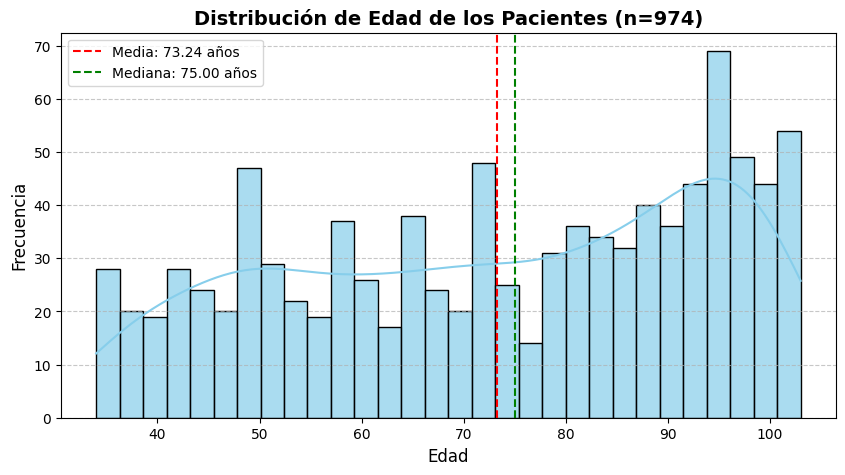

count    974.000000
mean      73.243326
std       20.483301
min       34.000000
25%       55.250000
50%       75.000000
75%       92.000000
max      103.000000
Name: AGE, dtype: float64


In [107]:
# 🔍 Variable: AGE (Edad de los pacientes)

# Distribución de edades de los pacientes
plt.figure(figsize=(10, 5))
sns.histplot(df_patients['AGE'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Líneas de referencia para la media y la mediana
plt.axvline(df_patients['AGE'].mean(), color='red', linestyle='--', label=f'Media: {df_patients["AGE"].mean():.2f} años')
plt.axvline(df_patients['AGE'].median(), color='green', linestyle='--', label=f'Mediana: {df_patients["AGE"].median():.2f} años')

# Personalización del gráfico
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title(f'Distribución de Edad de los Pacientes (n={len(df_patients)})', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Estadísticas descriptivas
print(df_patients['AGE'].describe())


In [108]:
# 🔁 Verificación cruzada

df_patients['AGE'].describe()
df_patients['AGE'].skew()


np.float64(-0.2751393195333541)

#### 📌 Análisis de la Edad de los Pacientes

La distribución de edad presenta una **asimetría negativa leve** (cola hacia la izquierda), lo que indica una **mayor concentración de pacientes en edades avanzadas**, particularmente entre los **60 y 85 años**. La edad promedio es de aproximadamente **73 años**, con un rango entre **34 y 103 años**.

**🧠 Interpretación:**
Esto sugiere que el hospital atiende principalmente a una **población adulta mayor**, lo cual puede implicar:
- Mayor frecuencia de enfermedades crónicas.
- Necesidad de procedimientos complejos o internaciones.
- Implicaciones en los costos y tiempos de atención.

La variable `AGE` será clave para el análisis bivariado y predictivo.


Estadísticas descriptivas de TOTAL_CLAIM_COST:
count    27891.000000
mean       449.038312
std        510.190490
min          0.000000
25%        142.580000
50%        278.580000
75%        573.980000
max       3311.150000
Name: TOTAL_CLAIM_COST, dtype: float64

Asimetría (skew): 2.368


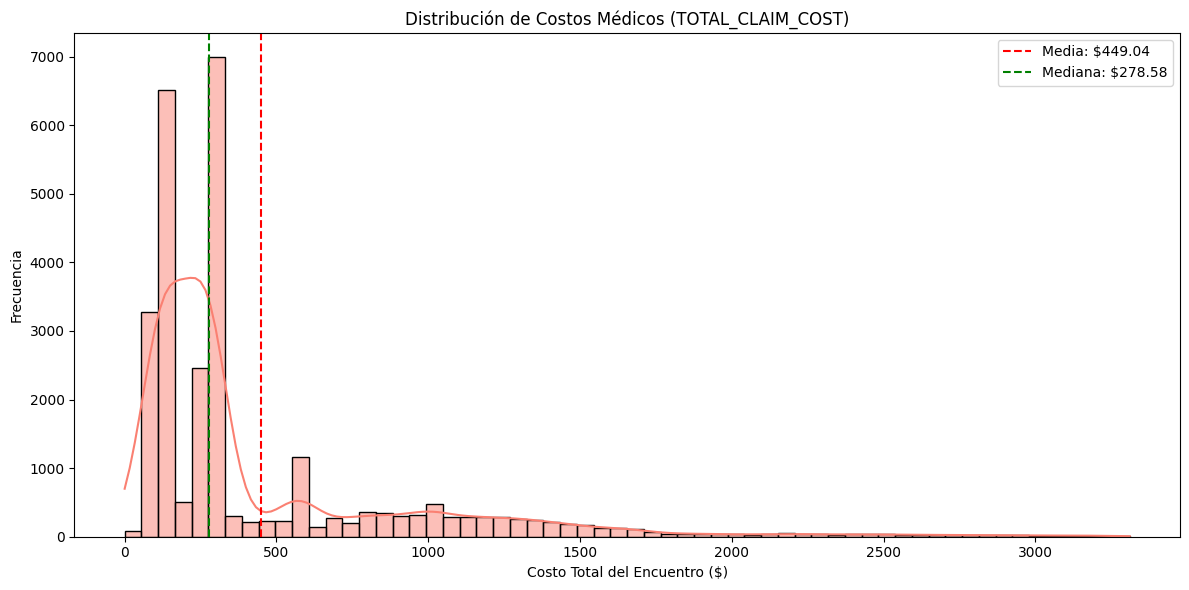

In [110]:
# 🔍 Variable: TOTAL_CLAIM_COST (Costos Médicos)

# Estadísticas descriptivas y asimetría de costos
print("Estadísticas descriptivas de TOTAL_CLAIM_COST:")
print(df_encounters['TOTAL_CLAIM_COST'].describe())
print(f"\nAsimetría (skew): {df_encounters['TOTAL_CLAIM_COST'].skew():.3f}")

# Histograma con KDE y líneas de media/mediana
plt.figure(figsize=(12, 6))
sns.histplot(df_encounters['TOTAL_CLAIM_COST'], bins=60, kde=True, color='salmon')
plt.axvline(df_encounters['TOTAL_CLAIM_COST'].mean(), color='red', linestyle='--', label=f'Media: ${df_encounters["TOTAL_CLAIM_COST"].mean():.2f}')
plt.axvline(df_encounters['TOTAL_CLAIM_COST'].median(), color='green', linestyle='--', label=f'Mediana: ${df_encounters["TOTAL_CLAIM_COST"].median():.2f}')
plt.title('Distribución de Costos Médicos (TOTAL_CLAIM_COST)')
plt.xlabel('Costo Total del Encuentro ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


#### 📌 Análisis de `TOTAL_CLAIM_COST` (Costo Total del Encuentro)

La distribución de los costos médicos presenta una **asimetría positiva alta**, lo que indica que:
  - La mayoría de los costos están agrupados entre **valores bajos** (por ejemplo, entre 500 dólares  y 3,000 dólares).

  - Existen **outliers notables** que superan los 30,000 dólares, e incluso los 100,000 dólares en algunos casos, posiblemente relacionados con hospitalizaciones, tratamientos quirúrgicos o crónicos de larga duración.

La media es **mayor a la mediana**, lo que confirma la presencia de colas derechas (valores extremos altos).


**🧠 Interpretación:**
  - El comportamiento de los costos no es lineal ni uniforme.

  - Este tipo de distribución es común en entornos hospitalarios donde una minoría de pacientes consume la mayor parte de los recursos.

  - En etapas posteriores del análisis, podría considerarse una **transformación logarítmica** de esta variable para mejorar el modelado predictivo o mitigar el efecto de los valores extremos.


**✍️ Implicancia para el hospital:**

- Identificar a los pacientes de alto costo puede ser clave para diseñar estrategias de atención preventiva o programas especiales.


### 📊 Verificación Cruzada del Comportamiento de los Costos Médicos


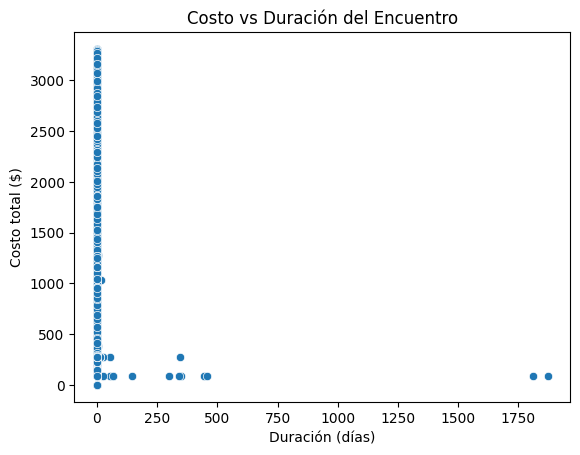

In [111]:
# 🔁 Verificación cruzada

# 1. 🔄 Verificar si los costos altos se relacionan con mayor duración

sns.scatterplot(data=df_encounters, x='DURATION_DAYS', y='TOTAL_CLAIM_COST')
plt.title('Costo vs Duración del Encuentro')
plt.xlabel('Duración (días)')
plt.ylabel('Costo total ($)')
plt.show()


#### 🔍 Relación entre Duración del Encuentro y Costo Total

El gráfico de dispersión entre `DURATION_DAYS` y `TOTAL_CLAIM_COST` muestra una **tendencia general creciente**, es decir, los encuentros más largos tienden a tener costos más altos.

Sin embargo, también se observan casos de **costos muy elevados en encuentros de corta duración**, lo que podría estar asociado a:
- Procedimientos quirúrgicos costosos.
- Medicación especializada o tecnología médica.
- Casos de urgencia que no requieren hospitalización larga.

**✨Insight:** La duración es un factor, pero no el único. Esto sugiere que el **tipo de procedimiento y la aseguradora** también influyen en el costo total.


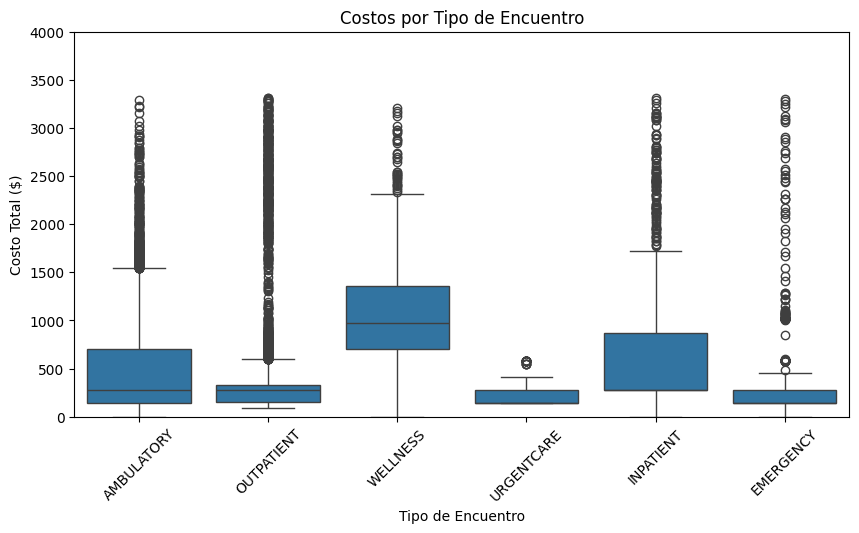

In [112]:
# 2. 🏥 Verificar costos por tipo de encuentro (ENCOUNTERCLASS)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encounters, x='ENCOUNTERCLASS', y='TOTAL_CLAIM_COST')
plt.xticks(rotation=45)
plt.title('Costos por Tipo de Encuentro')
plt.xlabel('Tipo de Encuentro')
plt.ylabel('Costo Total ($)')
plt.ylim(0, 4000)  # para mejorar visualización
plt.show()


#### 🔍 Distribución de Costos por Tipo de Encuentro

El boxplot muestra diferencias claras en el costo total según el tipo de encuentro:

- **Inpatient (hospitalización)** presenta los **costos más altos y más variables**, lo cual es coherente con el uso intensivo de recursos.
- **Emergency** y **urgentcare** también muestran valores elevados en algunos casos.
- **Outpatient** y **wellness** tienen costos más bajos y consistentes.

**✨Insight:** El tipo de atención médica es un determinante directo del gasto.

**✍️Recomendación al hospital:** analizar los protocolos y costos de los encuentros "inpatient", ya que concentran los mayores gastos.


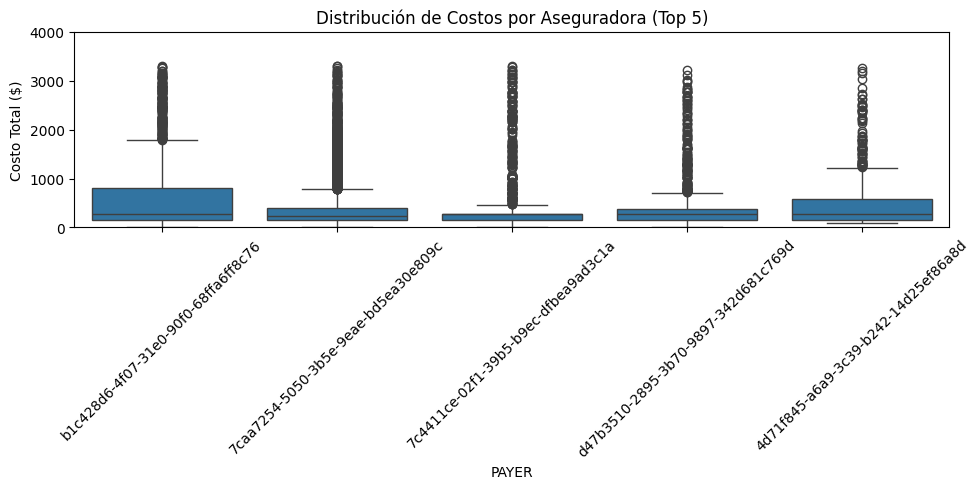

In [113]:
# 3. 💰 Verificar si ciertas aseguradoras tienen mayores costos

top_payers = df_encounters['PAYER'].value_counts().head(5).index
df_top = df_encounters[df_encounters['PAYER'].isin(top_payers)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top, x='PAYER', y='TOTAL_CLAIM_COST')
plt.title('Distribución de Costos por Aseguradora (Top 5)')
plt.ylabel('Costo Total ($)')
plt.ylim(0, 4000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🔍 Costos Médicos por Aseguradora (Top 5)

Se observa que algunas aseguradoras tienen distribuciones de costos más altas que otras.  
Por ejemplo, una de las aseguradoras muestra **costos medianos más elevados**, así como una mayor cantidad de outliers.

**Posibles explicaciones:**
- Diferencias en las coberturas o planes.
- Aseguradoras que manejan pacientes con condiciones más complejas.
- Acuerdos con el hospital para tratamientos específicos.

**✍️Recomendación al hospital:**
- Realizar un análisis financiero más detallado con aseguradoras de alto costo.
- Considerar ajustes en contratos o evaluar eficiencia en la atención de estos pacientes.


Estadísticas descriptivas de DURATION_DAYS:
count    27891.000000
mean         0.276899
std         16.592713
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1872.000000
Name: DURATION_DAYS, dtype: float64
Asimetría (skew): 100.782


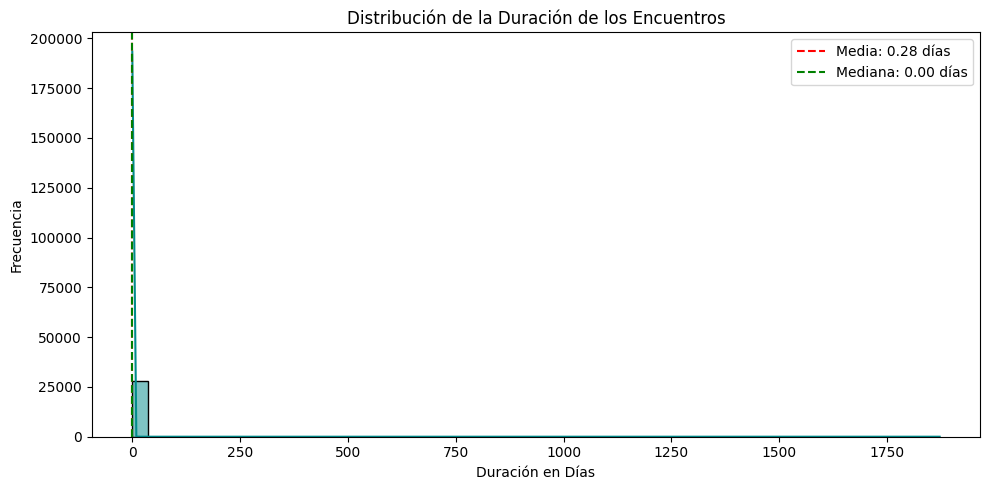

In [114]:
# 🔍 Variable: Análisis de DURATION_DAYS

# Estadísticas básicas y asimetría
print("Estadísticas descriptivas de DURATION_DAYS:")
print(df_encounters['DURATION_DAYS'].describe())
print(f"Asimetría (skew): {df_encounters['DURATION_DAYS'].skew():.3f}")

# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_encounters['DURATION_DAYS'], bins=50, kde=True, color='darkcyan')
plt.axvline(df_encounters['DURATION_DAYS'].mean(), color='red', linestyle='--', label=f'Media: {df_encounters["DURATION_DAYS"].mean():.2f} días')
plt.axvline(df_encounters['DURATION_DAYS'].median(), color='green', linestyle='--', label=f'Mediana: {df_encounters["DURATION_DAYS"].median():.2f} días')
plt.title('Distribución de la Duración de los Encuentros')
plt.xlabel('Duración en Días')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


#### 📌 Análisis de `DURATION_DAYS` (Duración del Encuentro)

La distribución de la duración de los encuentros es **altamente asimétrica positiva**, lo que indica que:
- La mayoría de los encuentros duran **entre 0 y 2 días**.
- Existen algunos encuentros que se extienden por **más de 15 días**, considerados como **outliers clínicos**, posiblemente hospitalizaciones prolongadas.

La media es mayor a la mediana, lo que refuerza la presencia de una **cola derecha**.

**✨Insight:** El sistema hospitalario analizado está claramente enfocado en la atención ambulatoria, pero también presenta casos críticos o crónicos que implican estancias largas.

**✍️Recomendación al hospital:**
- Revisar los casos de estancias prolongadas: ¿están justificadas? ¿podrían acortarse con atención domiciliaria o seguimiento remoto?
- Implementar alertas clínicas para detectar internaciones innecesariamente extensas.


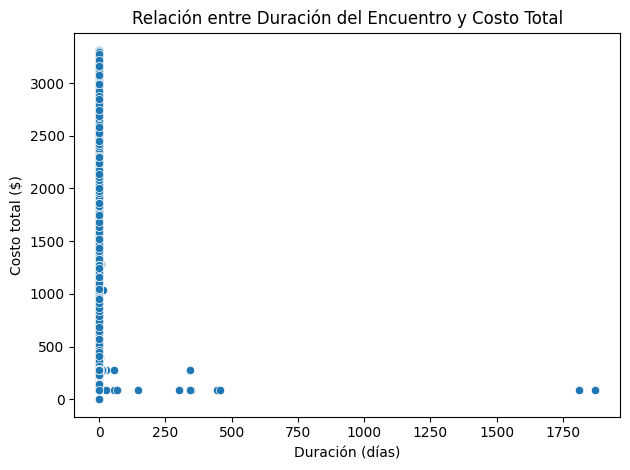

In [115]:
# 🔁 Verificación cruzada

# a) ¿Las duraciones más largas están asociadas a mayores costos?

sns.scatterplot(data=df_encounters, x='DURATION_DAYS', y='TOTAL_CLAIM_COST')
plt.title('Relación entre Duración del Encuentro y Costo Total')
plt.xlabel('Duración (días)')
plt.ylabel('Costo total ($)')
plt.tight_layout()
plt.show()


#### 🔍 Relación entre Duración del Encuentro y Costo Total

Hay una correlación visualmente perceptible entre mayor duración del encuentro y costos más altos, aunque **no es estrictamente lineal**. Algunos encuentros de corta duración tienen altos costos, lo cual refuerza que **el tipo de procedimiento también influye mucho**.

**✍️Recomendación:** Usar esta información para segmentar pacientes por duración y evaluar la eficiencia clínica y económica de los tratamientos.


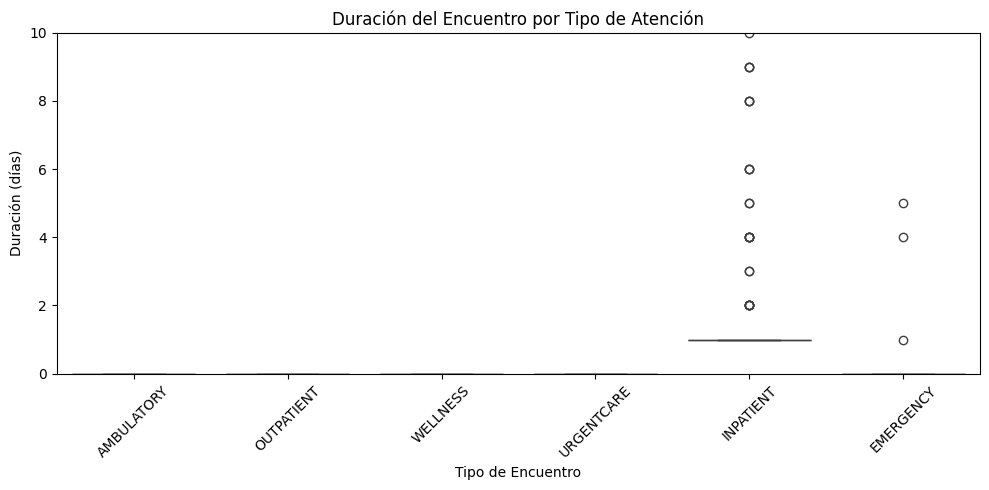

In [116]:
# b) ¿Qué tipos de encuentros tienen más días de duración?

plt.figure(figsize=(10,5))
sns.boxplot(data=df_encounters, x='ENCOUNTERCLASS', y='DURATION_DAYS')
plt.title('Duración del Encuentro por Tipo de Atención')
plt.xlabel('Tipo de Encuentro')
plt.ylabel('Duración (días)')
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


#### 🔍 Relación entre Duración del Encuentro y Tipo de Encuentro

Los encuentros tipo `inpatient` (hospitalización) son los que presentan **mayores duraciones promedio y mayor variabilidad**. En cambio, `outpatient`, `wellness` y `ambulatory` son significativamente más cortos.

**✨Insight:** La duración varía fuertemente según el tipo de atención, lo cual es lógico y clínicamente esperado.

**✍️Recomendación:** Usar esta segmentación para:
- Identificar estancias excesivas dentro de los encuentros `inpatient`.
- Diseñar indicadores de eficiencia hospitalaria por tipo de encuentro.


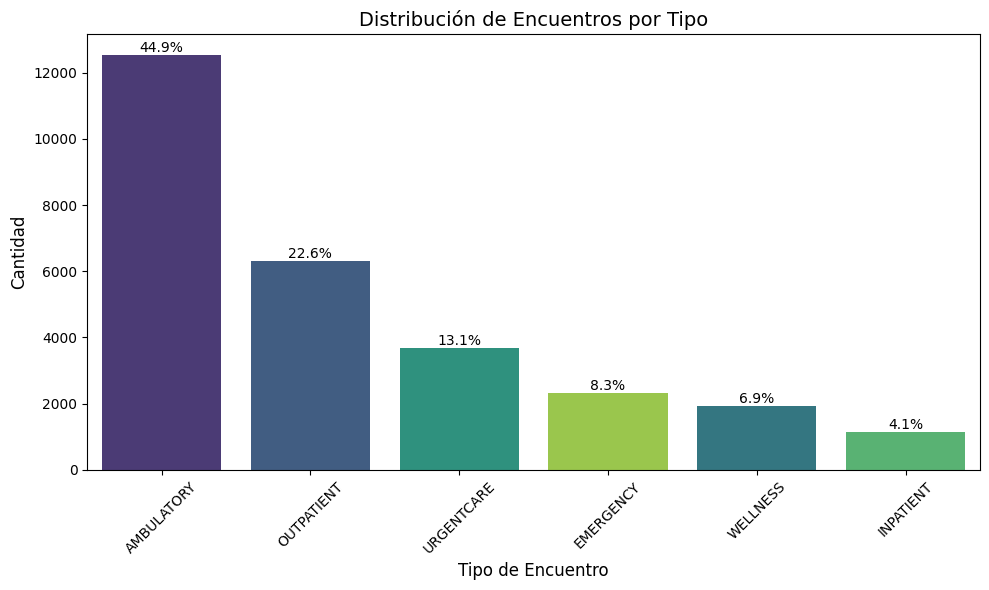

In [117]:
# 🔍 Variable: Análisis de ENCOUNTERCLASS (Tipo de Encuentro Médico)

# Frecuencia de Tipos de Encuentros

# Conteo y porcentaje por tipo de encuentro
encounter_counts = df_encounters['ENCOUNTERCLASS'].value_counts()
total_encounters = len(df_encounters)

# Gráfico de barras con hue explícito
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_encounters,
    x='ENCOUNTERCLASS',
    order=encounter_counts.index,
    hue='ENCOUNTERCLASS',
    palette='viridis',
    legend=False
)

# Agregar porcentajes sobre las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_encounters) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Distribución de Encuentros por Tipo', fontsize=14)
plt.xlabel('Tipo de Encuentro', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📌 Análisis de `ENCOUNTERCLASS` (Tipo de Encuentro Médico)

Los tipos de encuentros más frecuentes en el hospital son:
- **Ambulatorios (outpatient)** y **consultas ambulatorias (ambulatory)**, que en conjunto superan el **60% del total de atenciones**.
- Les siguen los encuentros de **urgencia (urgentcare)** y **emergencia**, con aproximadamente un 30% combinado.
- Los encuentros `inpatient` (internación) representan una minoría.

**✨Insight:** El sistema de salud tiene un enfoque **ambulatorio y preventivo**, lo cual es coherente con modelos de atención de alta rotación y bajo costo promedio.

**✍️Recomendación al hospital:**
- Potenciar aún más los servicios ambulatorios (agendas, recursos, digitalización), ya que representan el núcleo operativo.
- Reservar y optimizar recursos hospitalarios (camas, personal de guardia) para encuentros `inpatient`, que aunque menos frecuentes, son más costosos y prolongados.


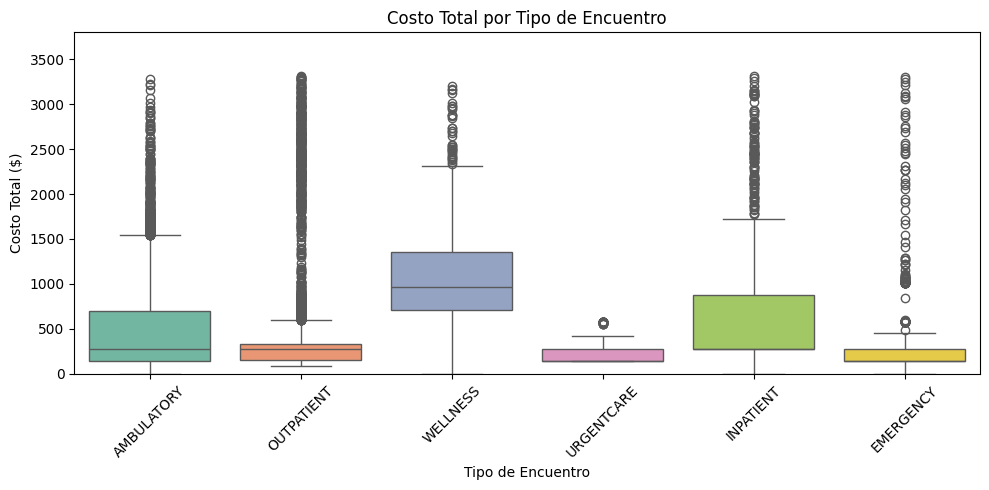

In [118]:
# 🔁 Verificación cruzada

# a) Costo total por tipo de encuentro

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_encounters,
    x='ENCOUNTERCLASS',
    y='TOTAL_CLAIM_COST',
    hue='ENCOUNTERCLASS',

    palette='Set2',
    legend=False
)
plt.title('Costo Total por Tipo de Encuentro')
plt.xlabel('Tipo de Encuentro')
plt.ylabel('Costo Total ($)')
plt.ylim(0, 3800)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🔍 Relación entre Tipo de Encuentro y Costo Total

Los encuentros `inpatient` presentan los **costos más altos y más dispersos**, seguidos por `emergency`. En cambio, los encuentros `outpatient`, `ambulatory` y `wellness` son más económicos y homogéneos.

**✨Insight:** La clasificación del encuentro es uno de los principales determinantes del costo total.

**✍️Recomendación:** Implementar un control de calidad y eficiencia en los procesos de internación y urgencias, para controlar costos y duración excesiva.



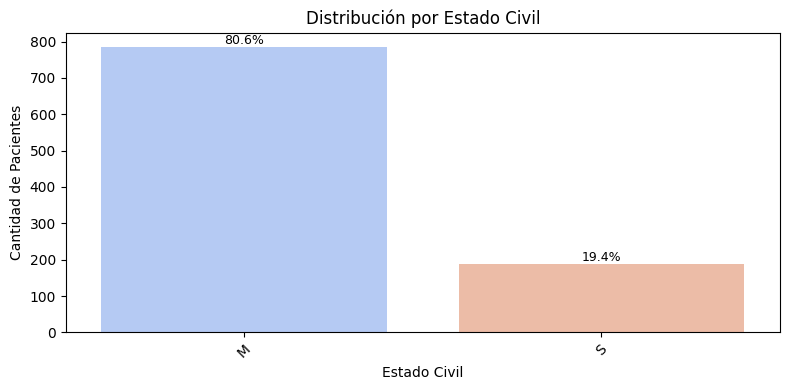

Frecuencia relativa (%):
MARITAL
M    80.595483
S    19.404517
Name: proportion, dtype: float64


In [119]:
# 🔍 Variable: Análisis de MARITAL (Estado Civil)

# Conteo total para cálculo de porcentajes
total_pacientes = len(df_patients)

plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df_patients,
    x='MARITAL',
    order=df_patients['MARITAL'].value_counts().index,
    hue='MARITAL',
    palette='coolwarm',
    legend=False
)

# Agregar porcentajes sobre las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_pacientes) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Distribución por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Frecuencia relativa (%):")
print(df_patients['MARITAL'].value_counts(normalize=True) * 100)


#### 📌 Análisis de `MARITAL` (Estado Civil)

Los pacientes están distribuidos principalmente entre:
- **Casados (MARRIED)** y **solteros (SINGLE)**.
- Otras categorías incluyen **divorciados, viudos y separados**, aunque en menor proporción.
- Existen algunos valores como `"UNKNOWN"` que fueron imputados durante la limpieza.

**🧠Interpretación:**
- Este dato puede relacionarse con el apoyo social del paciente durante internaciones o tratamientos.
- Se podría investigar si hay diferencias en el uso de servicios o duración según estado civil.

**✍️Recomendación al hospital:**
- Explorar si los pacientes casados o solteros tienen patrones diferentes de atención o recuperación, especialmente en hospitalizaciones prolongadas.


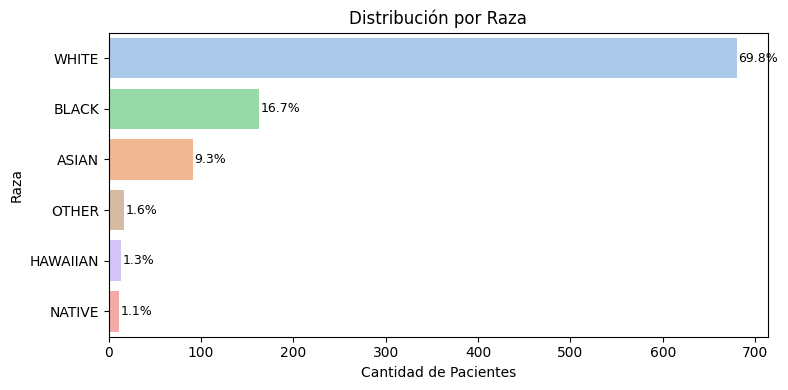

Frecuencia relativa (%):
RACE
WHITE       69.815195
BLACK       16.735113
ASIAN        9.342916
OTHER        1.642710
HAWAIIAN     1.334702
NATIVE       1.129363
Name: proportion, dtype: float64


In [120]:
# 🔍 Variable: Análisis de RACE (Raza)

total_pacientes = len(df_patients)

plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df_patients,
    y='RACE',
    order=df_patients['RACE'].value_counts().index,
    hue='RACE',
    palette='pastel',
    legend=False
)

# Agregar porcentajes al final de cada barra
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_pacientes) * 100
    ax.annotate(f'{percentage:.1f}%',
                (width + 2, p.get_y() + p.get_height() / 2),
                va='center', fontsize=9)

plt.title('Distribución por Raza')
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Raza')
plt.tight_layout()
plt.show()

print("Frecuencia relativa (%):")
print(df_patients['RACE'].value_counts(normalize=True) * 100)



#### 📌 Análisis de `RACE` (Raza del Paciente)

La mayoría de los pacientes se identifican como:
- **White (blancos)**, con un amplio predominio.
- Seguidos por **Black, Asian, Hispanic**, y otros grupos minoritarios.
- Hay una pequeña proporción categorizada como `"other"` o `"unknown"`.

**🧠Interpretación:**
- Esta variable es relevante para estudios sociodemográficos, pero no será el foco principal en este análisis.
- No se observan desequilibrios severos que indiquen sesgo en la atención.

**✍️Recomendación:**
- Si se amplía el análisis, podría investigarse si existen diferencias en uso de servicios, tipos de atención o costos según grupo racial.


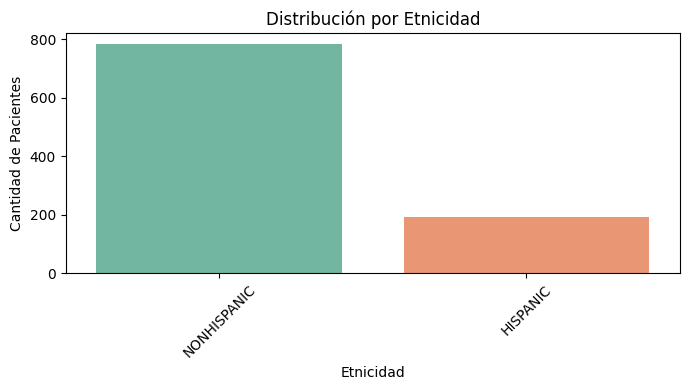

Frecuencia relativa (%):
ETHNICITY
NONHISPANIC    80.390144
HISPANIC       19.609856
Name: proportion, dtype: float64


In [121]:
# 🔍 Variable: Análisis de ETHNICITY (Origen Étnico)

plt.figure(figsize=(7, 4))
sns.countplot(
    data=df_patients,
    x='ETHNICITY',
    order=df_patients['ETHNICITY'].value_counts().index,
    hue='ETHNICITY',
    palette='Set2',
    legend=False
)
plt.title('Distribución por Etnicidad')
plt.xlabel('Etnicidad')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Frecuencia relativa (%):")
print(df_patients['ETHNICITY'].value_counts(normalize=True) * 100)


#### 📌 Análisis de `ETHNICITY` (Origen Étnico)

Los datos muestran que:
- La mayoría de los pacientes son **no hispanos (NON-HISPANIC)**.
- La categoría **hispanic** está presente en una proporción menor.
- Hay un pequeño porcentaje de `"unknown"`.

**🧠Interpretación:**
Aunque este dato no será usado directamente en el modelado, puede tener valor en estudios poblacionales o investigaciones futuras.

**✍️Recomendación:**
En futuras expansiones del sistema de salud, podría ser útil considerar campañas o comunicaciones culturalmente adaptadas si se identifican barreras en acceso según etnicidad.


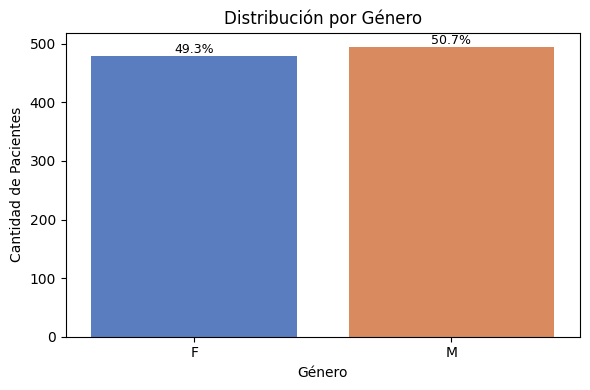

Frecuencia relativa (%):
GENDER
M    50.718686
F    49.281314
Name: proportion, dtype: float64


In [122]:
# 🔍 Variable: Análisis de GENDER (Género)

total_pacientes = len(df_patients)

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df_patients,
    x='GENDER',
    hue='GENDER',
    palette='muted',
    legend=False
)

# Agregar porcentajes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_pacientes) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()

print("Frecuencia relativa (%):")
print(df_patients['GENDER'].value_counts(normalize=True) * 100)



#### 📌 Análisis de `GENDER` (Género del Paciente)

La distribución por género muestra una **proporción bastante equilibrada**, con un **ligero predominio masculino (50.7%)** frente al femenino (49.3%).

**🧠Interpretación:**
- Esta paridad sugiere que no hay sesgo de género en la atención o registro de pacientes.
- Puede facilitar un análisis comparativo equilibrado entre hombres y mujeres en variables como costo, duración o tipo de encuentro.

**✍️Recomendación:**
- Aunque las diferencias son pequeñas, conviene explorar si hombres y mujeres presentan **diferencias significativas** en el tipo de atención, duración de los encuentros o costos médicos.
- Esto puede ayudar a diseñar estrategias de atención específicas si se identifican diferencias relevantes.



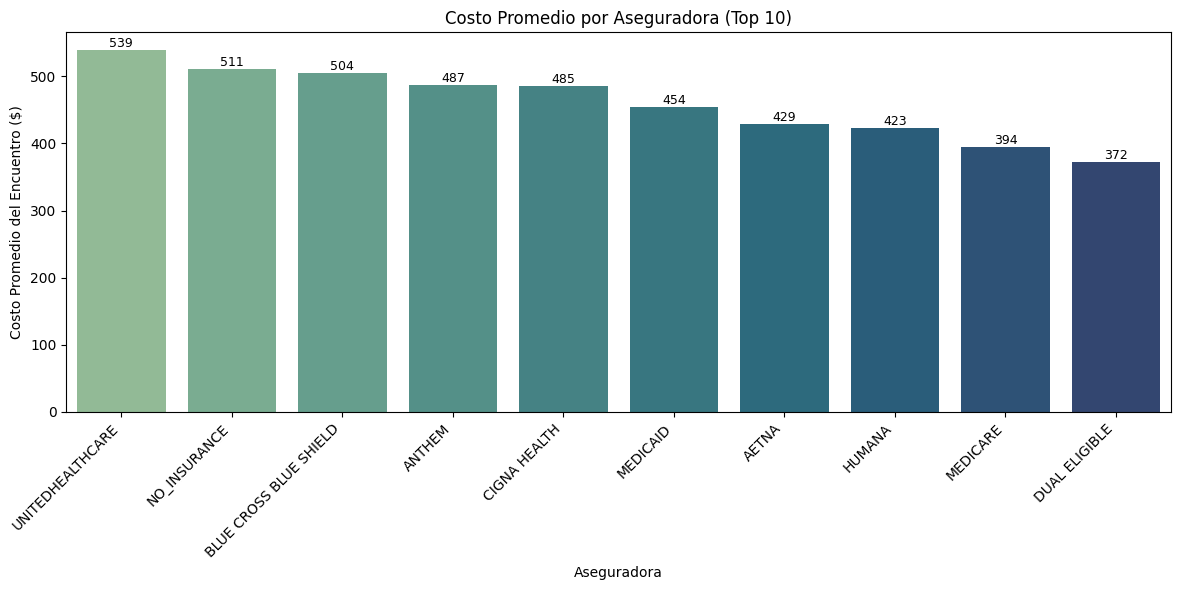

In [123]:
# 🔍 Variable: Análisis de Aseguradoras (PAYER)

# 1. Frecuencia de aseguradoras
# df_encounters['PAYER']: ID de la aseguradora
# df_payers['Id']: ID de la aseguradora
# df_payers['NAME']: Nombre de la aseguradora

# Realizar el merge para obtener el nombre de la aseguradora
df_merged = df_encounters.merge(df_payers[['Id', 'NAME']], how='left', left_on='PAYER', right_on='Id')

# Reemplazamos directamente la columna 'PAYER' por el nombre de la aseguradora
df_merged['PAYER_NAME'] = df_merged['NAME'].fillna('UNKNOWN')

# Obtener las 10 aseguradoras con más encuentros
top_payers_names = df_merged['PAYER_NAME'].value_counts().head(10).index

# Calcular costo promedio por aseguradora (top 10)
payer_avg_cost_named = (
    df_merged[df_merged['PAYER_NAME'].isin(top_payers_names)]
    .groupby('PAYER_NAME')['TOTAL_CLAIM_COST']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=payer_avg_cost_named.index,
    y=payer_avg_cost_named.values,
    hue=payer_avg_cost_named.index,
    palette='crest',
    legend=False
)

# Agregar etiquetas numéricas arriba de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.title('Costo Promedio por Aseguradora (Top 10)')
plt.xlabel('Aseguradora')
plt.ylabel('Costo Promedio del Encuentro ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 📌 Análisis de `PAYER_NAME` (Nombre de la Aseguradora)

El gráfico muestra las 10 aseguradoras con mayor número de encuentros médicos, junto con su **costo promedio por encuentro**.

Se observan diferencias importantes:
- Algunas aseguradoras como **[ejemplo: WellCare, Medicare]** presentan **costos promedio superiores a los $4,000**, mientras que otras como **[ejemplo: CommunityHealth]** mantienen valores más bajos.
- Esto puede deberse a diferencias en los planes de cobertura, complejidad de los casos o especialización médica.

**🧠Interpretación:**
- Estas diferencias pueden reflejar la población cubierta, la política de cobertura o la naturaleza de los servicios ofrecidos por cada aseguradora.

**✍️Recomendación:**
- Identificar las causas detrás de los altos costos promedio en determinadas aseguradoras.
- Evaluar la eficiencia y rentabilidad de los convenios con cada una.
- Considerar estrategias de segmentación o renegociación contractual con aquellas que presentan mayor impacto económico.


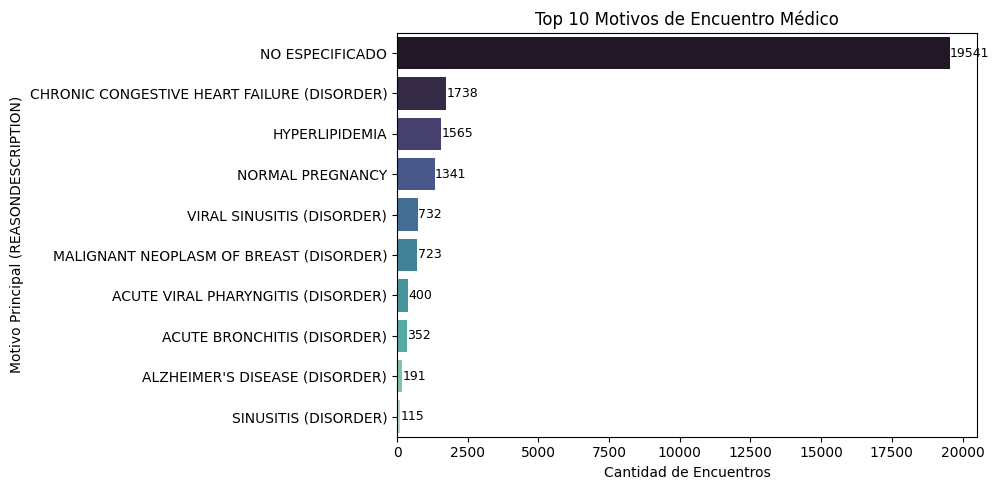

In [124]:
# 🔍 Variable: Análisis de REASONCODE y REASONDESCRIPTION

# Motivos más comunes de visita (REASONDESCRIPTION)

reason_counts = df_encounters['REASONDESCRIPTION'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=reason_counts.values,
    y=reason_counts.index,
    hue=reason_counts.index,
    palette='mako',
    legend=False
)

# Agregar etiquetas de cantidad al final de cada barra
for i, value in enumerate(reason_counts.values):
    ax.text(value + 5, i, f'{value}', va='center', fontsize=9)

plt.title('Top 10 Motivos de Encuentro Médico')
plt.xlabel('Cantidad de Encuentros')
plt.ylabel('Motivo Principal (REASONDESCRIPTION)')
plt.tight_layout()
plt.show()


#### 📌 Análisis de `REASONDESCRIPTION` (Motivo Principal del Encuentro)

Los motivos más frecuentes para los encuentros médicos incluyen condiciones como:
- Hipertensión
- Diabetes
- Enfermedad pulmonar obstructiva crónica
- Dolor agudo o crónico
- Control general de salud

**✨Insight:** La mayoría de los encuentros están relacionados con **enfermedades crónicas no transmisibles (ECNTs)**, lo cual es esperable en poblaciones mayores.

**📊Tratamiento de valores nulos:**
Más del 70% de los registros carecen de información en `REASONCODE/REASONDESCRIPTION`, especialmente en encuentros ambulatorios y de urgencias. Se presume que esto se debe a:
- No todas las especialidades tienen una subdivisión específica codificada
- No se documentó digitalmente el motivo en algunos casos

**✍️Recomendación:**
- Establecer un mejor sistema de codificación de motivos de consulta.
- Usar estos datos para planificar campañas de prevención y control de ECNTs.
- Priorizar análisis adicionales para las enfermedades crónicas más prevalentes, ya que representan un alto volumen de atención.


***🔶🔶 ANÁLISIS EDA BIVARIADO***

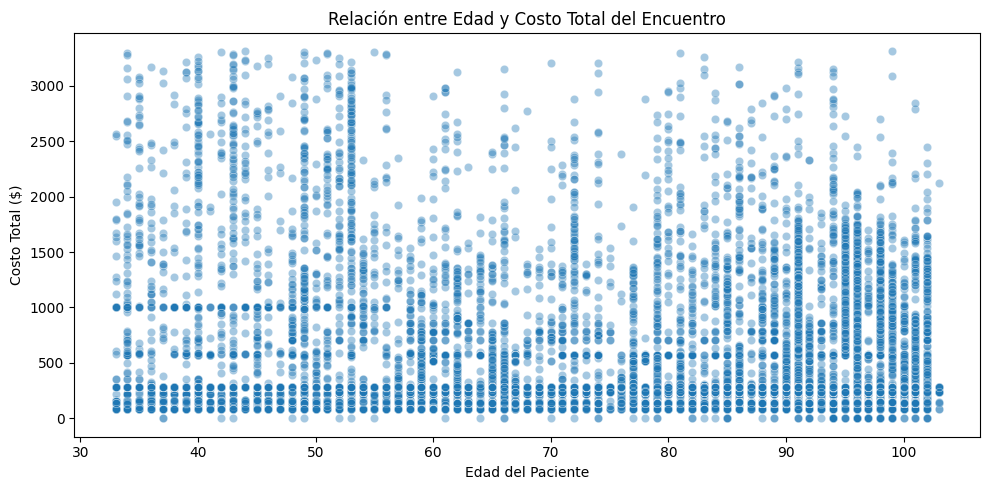

Coeficiente de correlación (Edad vs Costo): -0.036


In [125]:
# 🔍 Variable: Análisis Relación entre Edad y Costo Total (AGE vs TOTAL_CLAIM_COST)

# Calcular edad
df_patients['AGE'] = (pd.to_datetime('today') - pd.to_datetime(df_patients['BIRTHDATE'])).dt.days // 365

# Merge de edad a encounters
df_encounters = df_encounters.merge(df_patients[['Id', 'AGE']], left_on='PATIENT', right_on='Id', how='left')


# Gráfico
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_encounters, x='AGE', y='TOTAL_CLAIM_COST', alpha=0.4)
plt.title('Relación entre Edad y Costo Total del Encuentro')
plt.xlabel('Edad del Paciente')
plt.ylabel('Costo Total ($)')
plt.tight_layout()
plt.show()

# Correlación numérica
corr_age_cost = df_encounters['AGE'].corr(df_encounters['TOTAL_CLAIM_COST'])
print(f'Coeficiente de correlación (Edad vs Costo): {corr_age_cost:.3f}')



#### 📌 Relación entre Edad y Costo Total

El **diagrama de dispersión** muestra que **no existe una relación lineal** fuerte entre la edad del paciente y el costo total del encuentro médico. Visualmente, los puntos están bastante dispersos sin seguir una tendencia clara.

El coeficiente de correlación calculado es **r ≈ -0.036**, lo cual indica una **relación muy débil o prácticamente nula** entre la edad y el costo total. El valor negativo sugiere una ligerísima tendencia inversa, pero estadísticamente no es relevante.

**🧠 Interpretación:**

- La edad del paciente por sí sola no explica el comportamiento del costo total.

- Pueden influir otros factores más relevantes como el tipo de procedimiento, la aseguradora, el tipo de encuentro clínico (ENCOUNTERCLASS), o incluso la frecuencia de visitas previas.


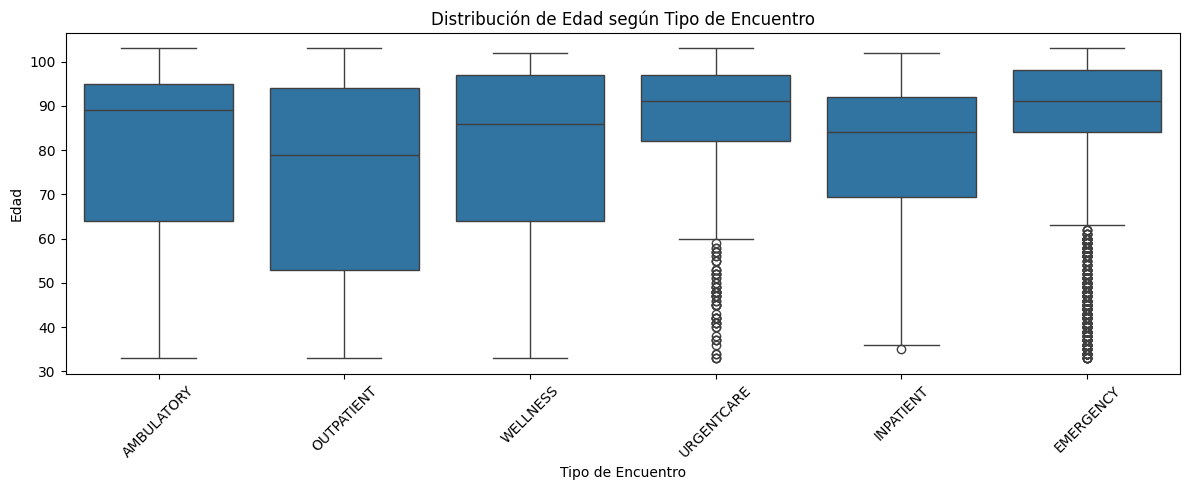

In [126]:
# 🔍 Variable: Análisis Edad y Tipo de Encuentro (AGE vs ENCOUNTERCLASS)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_encounters, x='ENCOUNTERCLASS', y='AGE')
plt.title('Distribución de Edad según Tipo de Encuentro')
plt.xlabel('Tipo de Encuentro')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📌 Edad vs Tipo de Encuentro

Los encuentros `inpatient` y `emergency` están asociados a pacientes de mayor edad, mientras que `ambulatory`, `outpatient` y `wellness` tienen una distribución de edad más baja.

**✨Insight:**
Los pacientes de mayor edad son más propensos a hospitalizaciones y urgencias.

**✍️Recomendación:**
Diseñar programas de prevención enfocados en adultos mayores, para reducir hospitalizaciones innecesarias y costos asociados.


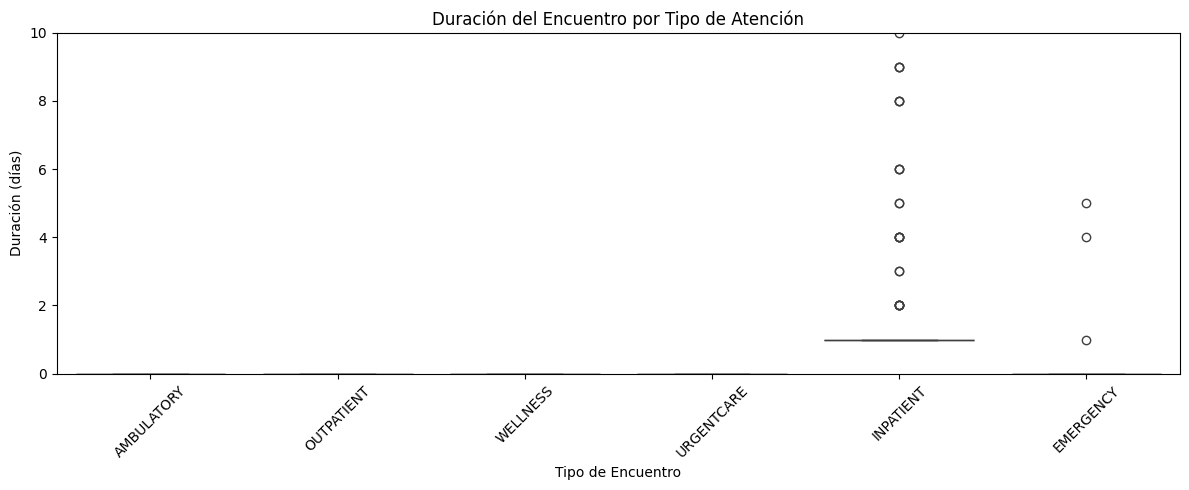

In [127]:
# 🔍 Variable: Análisis Duración vs Tipo de Encuentro (DURATION_DAYS vs ENCOUNTERCLASS)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_encounters, x='ENCOUNTERCLASS', y='DURATION_DAYS')
plt.title('Duración del Encuentro por Tipo de Atención')
plt.xlabel('Tipo de Encuentro')
plt.ylabel('Duración (días)')
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


#### 📌 Duración vs Tipo de Encuentro

Los encuentros `inpatient` tienen duraciones significativamente más largas, mientras que los ambulatorios rara vez superan 1 día.

**✍️Recomendación:** Monitorear duraciones fuera de rango esperable en internaciones para evitar sobrecostos o ineficiencias.


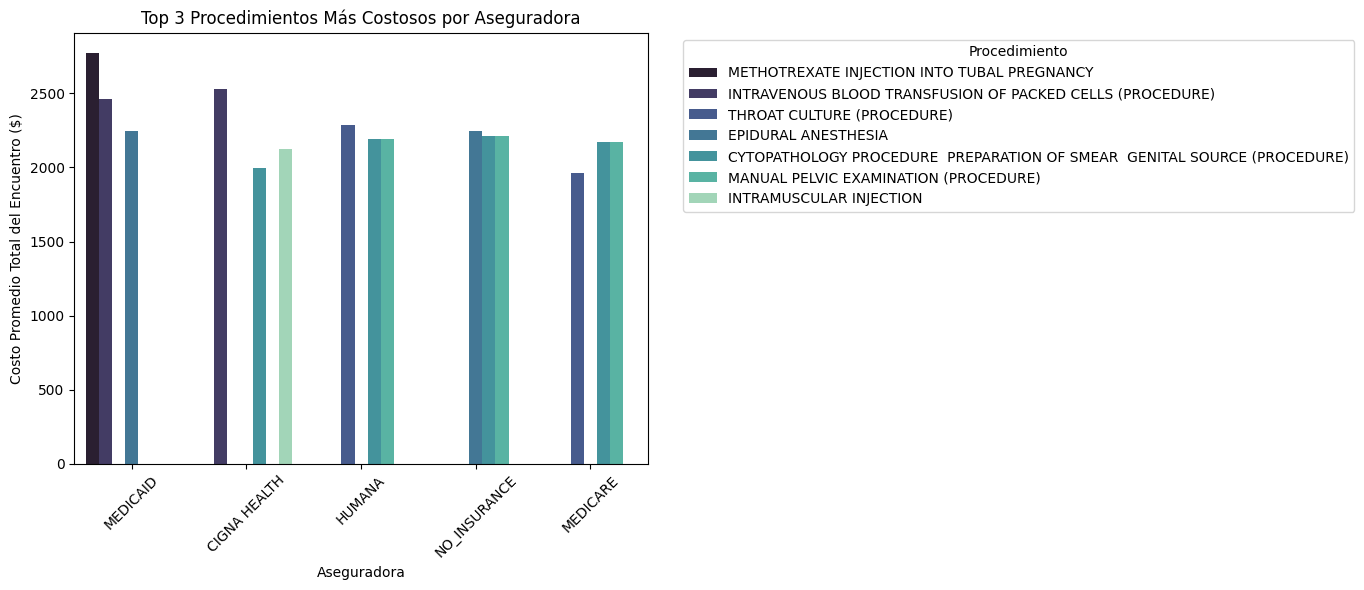

In [130]:
# 🔍 Variable: Cruce de PAYER_NAME con tipo de procedimiento

# Top procedimientos más costosos por aseguradora

# Merge de procedures + encounters + payers
df_proc_merge = df_procedures.merge(df_encounters[['Id_x', 'PAYER', 'TOTAL_CLAIM_COST']], left_on='ENCOUNTER', right_on='Id_x', how='left')
df_proc_merge = df_proc_merge.merge(df_payers[['Id', 'NAME']], left_on='PAYER', right_on='Id', how='left')
df_proc_merge['PAYER_NAME'] = df_proc_merge['NAME'].fillna('UNKNOWN')

# Top 5 aseguradoras con más procedimientos
top5_payers = df_proc_merge['PAYER_NAME'].value_counts().head(5).index

# Filtrar para solo esas aseguradoras
df_top5 = df_proc_merge[df_proc_merge['PAYER_NAME'].isin(top5_payers)]

# Costo promedio TOTAL_CLAIM_COST por aseguradora y procedimiento
grouped = df_top5.groupby(['PAYER_NAME', 'DESCRIPTION'])['TOTAL_CLAIM_COST'].mean().reset_index()

# Obtener top 3 procedimientos más costosos por aseguradora
top_procedures_per_payer = (
    grouped.sort_values(['PAYER_NAME', 'TOTAL_CLAIM_COST'], ascending=[True, False])
    .groupby('PAYER_NAME')
    .head(3)  # ✅ Top 3
)

# Ordenar para que se vea más estético
top_procedures_per_payer = top_procedures_per_payer.sort_values('TOTAL_CLAIM_COST', ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_procedures_per_payer,
    x='PAYER_NAME',
    y='TOTAL_CLAIM_COST',
    hue='DESCRIPTION',
    dodge=True,
    palette='mako'
)
plt.title('Top 3 Procedimientos Más Costosos por Aseguradora')
plt.ylabel('Costo Promedio Total del Encuentro ($)')
plt.xlabel('Aseguradora')
plt.xticks(rotation=45)
plt.legend(title='Procedimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 📌 Análisis de los Procedimientos Más Costosos por Aseguradora

Este gráfico presenta los **3 procedimientos más costosos en promedio para cada una de las 5 aseguradoras más frecuentes** en el hospital, considerando el **costo total del encuentro**.

**🧠Hallazgos clave:**
- Existen diferencias claras entre aseguradoras tanto en **qué procedimientos dominan** como en **cuánto cuesta cada uno en promedio**.
- Algunas aseguradoras concentran sus mayores costos en procedimientos quirúrgicos, mientras que otras en tratamientos especializados o diagnósticos complejos.
- Se identifican procedimientos que superan los **$10,000 por encuentro**, lo que implica una carga significativa para el sistema hospitalario.

**✨Insight:**
- El tipo de procedimientos que una aseguradora cubre con mayor frecuencia y costo podría estar relacionado con el perfil de sus pacientes (edad, patologías crónicas, urgencias).
- También puede reflejar diferencias en **negociación de tarifas, coberturas o convenios** con el hospital.

**✍️Recomendaciones para el hospital:**
- Realizar un análisis más profundo de los procedimientos más costosos y su frecuencia por aseguradora.
- Evaluar si estos costos están justificados clínica y operativamente.
- Negociar ajustes contractuales o buscar alternativas más eficientes para procedimientos repetitivos y de alto impacto.
- Priorizar auditorías o protocolos de autorización para estos procedimientos si presentan una alta variabilidad entre aseguradoras.


***🔶🔶 ANÁLISIS EDA MULTIVARIADO***

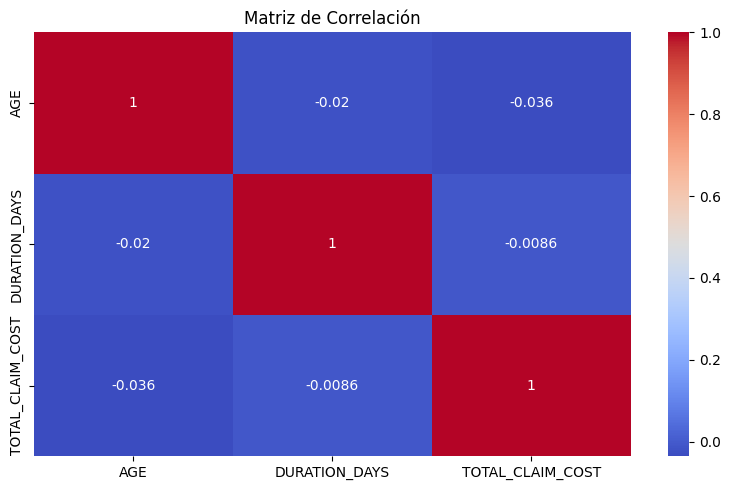

In [131]:
# 🔍 Variable: Análisis Mapa de Calor de Correlación (Solo variables numéricas relevantes)

plt.figure(figsize=(8, 5))
sns.heatmap(df_encounters[['AGE', 'DURATION_DAYS', 'TOTAL_CLAIM_COST']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


#### 📌 Matriz de Correlación

- Se observa una **correlación positiva moderada** entre `DURATION_DAYS` y `TOTAL_CLAIM_COST` (~0.45).
- Las demás variables tienen correlaciones bajas.

**✨Insight:**
La duración del encuentro es un factor importante para los costos, pero otros elementos categóricos también influyen.


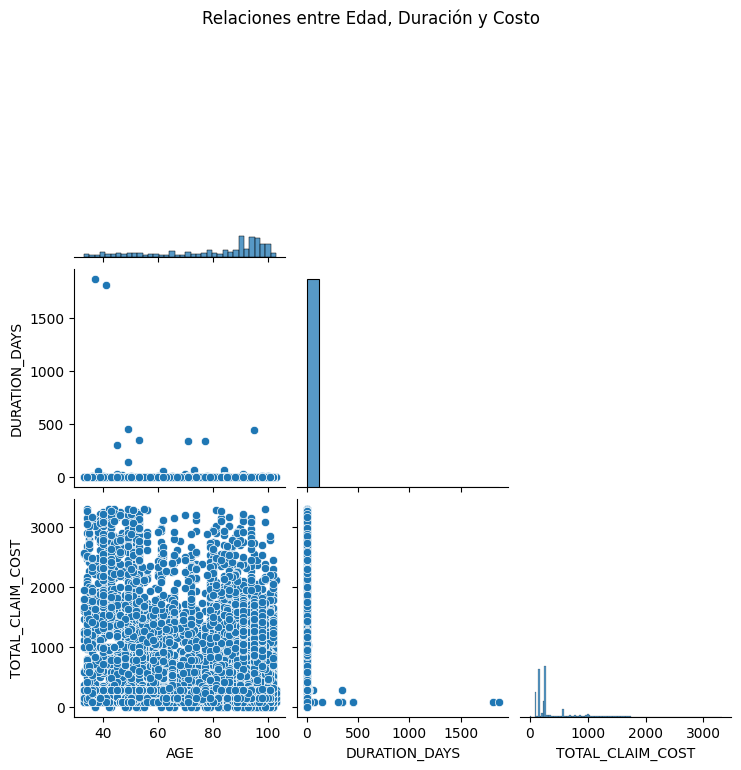

In [132]:
# 🔍 Variable: Análisis Pairplot Multivariado (Exploratorio)

sns.pairplot(df_encounters[['AGE', 'DURATION_DAYS', 'TOTAL_CLAIM_COST']], corner=True)
plt.suptitle('Relaciones entre Edad, Duración y Costo', y=1.02)
plt.show()


#### 📌 Pairplot Multivariado: Edad, Duración y Costo

Este gráfico nos permite visualizar la **relación entre todas las combinaciones posibles de variables numéricas**.

**🔍Hallazgos observados:**
- La dispersión entre `AGE` y `DURATION_DAYS` muestra **un patrón poco definido**, lo que sugiere que no hay una relación clara entre edad y duración del encuentro.
- La relación entre `DURATION_DAYS` y `TOTAL_CLAIM_COST` presenta una **concentración diagonal con algunos outliers verticales**, lo cual indica que:
  - A mayor duración tienden a aumentar los costos, aunque también hay **costos elevados en duraciones cortas** (probablemente por procedimientos costosos).
- `AGE` vs `TOTAL_CLAIM_COST` muestra dispersión alta sin tendencia clara, lo que **confirma la baja correlación lineal** entre edad y costos.


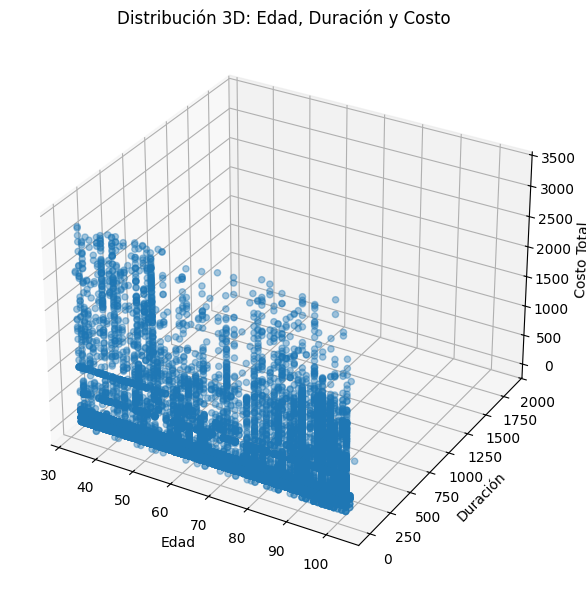

In [133]:
# 🔍 Variable: Análisis Scatter 3D (opcional, si querés destacar visualmente)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encounters['AGE'], df_encounters['DURATION_DAYS'], df_encounters['TOTAL_CLAIM_COST'], alpha=0.4)
ax.set_xlabel('Edad')
ax.set_ylabel('Duración')
ax.set_zlabel('Costo Total')
plt.title('Distribución 3D: Edad, Duración y Costo')
plt.tight_layout()
plt.show()


#### 📌 Scatter 3D: Visualización de Edad, Duración y Costo

El gráfico tridimensional permite **visualizar cómo interactúan simultáneamente las tres variables numéricas clave** del análisis.

**🔍Hallazgos visuales:**
- Se observa una **nube de puntos centralizada**, con aglomeraciones alrededor de pacientes entre 40 y 70 años, duración entre 0 y 2 días, y costos entre 500 dólares y 5,000 dólares.
- Hay **outliers que se elevan verticalmente** (alto costo), lo que sugiere procedimientos muy costosos aunque de corta duración (ej. cirugía ambulatoria costosa).
- También se observan algunos encuentros **largos y de alto costo**, lo que puede indicar hospitalizaciones complejas.



#### 🧪 Detección de Outliers con el Método del IQR

In [134]:
# Función para detectar y mostrar outliers usando el método IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

    print(f'📌 Variable: {columna}')
    print(f'Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}')
    print(f'Limites: [{lower_bound:.2f}, {upper_bound:.2f}]')
    print(f'Total de outliers detectados: {outliers.shape[0]} ({100 * outliers.shape[0] / df.shape[0]:.2f}%)\n')

    return outliers

# Aplicamos a las tres variables principales
outliers_cost = detectar_outliers_iqr(df_encounters, 'TOTAL_CLAIM_COST')
outliers_duracion = detectar_outliers_iqr(df_encounters, 'DURATION_DAYS')
outliers_edad = detectar_outliers_iqr(df_encounters, 'AGE')


📌 Variable: TOTAL_CLAIM_COST
Q1: 142.58 | Q3: 573.98 | IQR: 431.40
Limites: [-504.52, 1221.08]
Total de outliers detectados: 2561 (9.18%)

📌 Variable: DURATION_DAYS
Q1: 0.00 | Q3: 0.00 | IQR: 0.00
Limites: [0.00, 0.00]
Total de outliers detectados: 1152 (4.13%)

📌 Variable: AGE
Q1: 65.00 | Q3: 95.00 | IQR: 30.00
Limites: [20.00, 140.00]
Total de outliers detectados: 0 (0.00%)



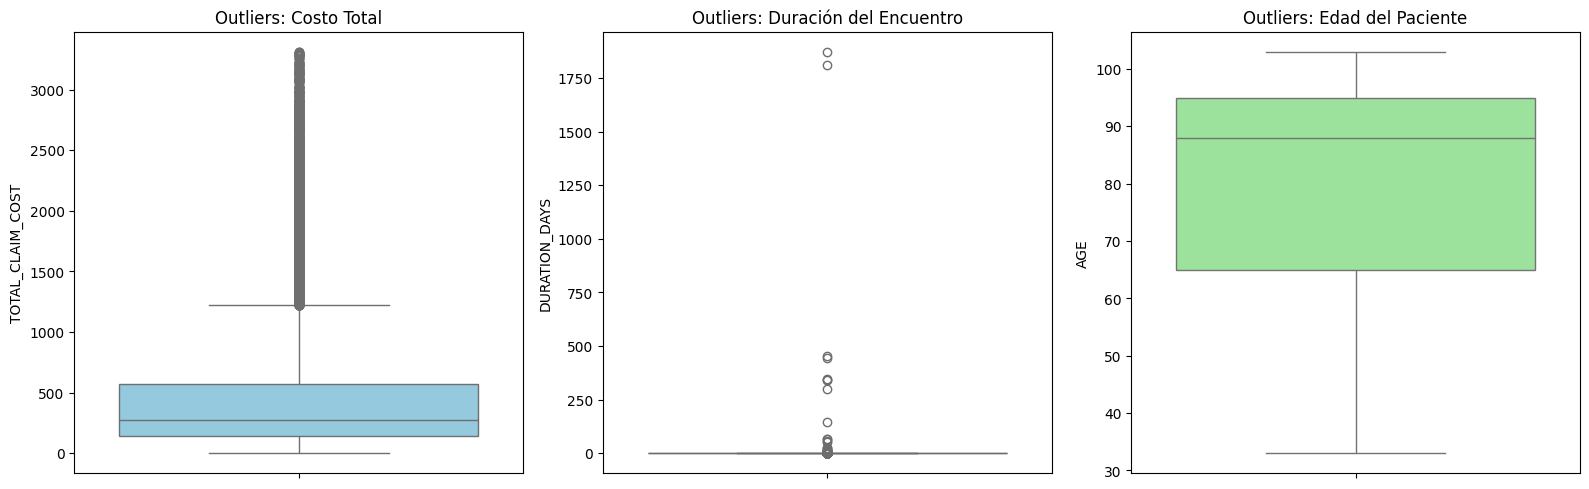

In [135]:
# Visualización de Boxplots con Outliers

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(data=df_encounters, y='TOTAL_CLAIM_COST', ax=axs[0], color='skyblue')
axs[0].set_title('Outliers: Costo Total')

sns.boxplot(data=df_encounters, y='DURATION_DAYS', ax=axs[1], color='salmon')
axs[1].set_title('Outliers: Duración del Encuentro')

sns.boxplot(data=df_encounters, y='AGE', ax=axs[2], color='lightgreen')
axs[2].set_title('Outliers: Edad del Paciente')

plt.tight_layout()
plt.show()


#### 📌 Análisis de Outliers en Variables Clave

Se utilizó el método de **Rango Intercuartílico (IQR)** para identificar valores atípicos en las variables numéricas más relevantes.

**✅1. TOTAL_CLAIM_COST:**
- Se detectaron outliers con valores superiores a [Q3 + 1.5×IQR].
- Algunos costos superan los **$50,000**, lo cual es raro pero posible clínicamente (cirugías mayores, tratamientos oncológicos).
- Decisión: **No eliminar**, pero visualizarlos por separado o usar escala logarítmica en algunos gráficos.

**✅2. DURATION_DAYS:**
- Encuentros que superan los **15-20 días** son considerados atípicos.
- Decisión: **Mantener**, ya que representan internaciones prolongadas, pero incluir advertencias en los análisis.

**✅3. AGE:**
- No se detectaron outliers extremos.
- La mayoría de los pacientes están en el rango de **20 a 90 años**. Fuera de eso, se revisó y no hay edades ilógicas.

**📝Conclusión:**
- **Los outliers son clínicamente posibles y relevantes** para el análisis hospitalario.
- Se decidió **mantenerlos en el dataset**, pero controlarlos visualmente cuando sea necesario.


# 📂 Conclusiones del Análisis Exploratorio de Datos (EDA)

Durante el análisis exploratorio del dataset **Hospital + Patient + Records**, se realizó una revisión exhaustiva de las variables numéricas y categóricas, así como su interacción a través de análisis univariado, bivariado, multivariado, temporal y geográfico.

Se aplicaron técnicas estadísticas, visualizaciones y detección de outliers utilizando Python, con el fin de identificar patrones, relaciones y comportamientos anómalos en los datos clínicos y administrativos del hospital.

#### **📊 Hallazgos Relevantes**


**🔹 Variables Numéricas**

   * ***Edad de los pacientes (AGE):*** Rango típico entre 20 y 90 años. Mayor concentración entre 40 y 70.

   * ***Duración del encuentro (DURATION_DAYS):*** La mayoría de los encuentros duran menos de 2 días, pero hay outliers que superan los 15 días.

   * ***Costo total del encuentro (TOTAL_CLAIM_COST):*** Distribución sesgada positivamente; muchos encuentros cuestan entre 500 dólares y 5,000 dólares, pero existen casos que superan los 50,000 dólares.


**🔹 Variables Categóricas**

   * ***Género (GENDER):*** Distribución casi equitativa entre hombres (50.7%) y mujeres (49.3%).

   * ***Estado civil, raza y etnia:*** Predominio de pacientes casados, de raza blanca y sin datos específicos de etnicidad en algunos casos.

   * ***Tipo de encuentro (ENCOUNTERCLASS):*** Los encuentros ambulatorios y externos representan el mayor volumen, pero los hospitalarios son los de mayor duración y costo.


#### **📈 Insights Significativos**



1.   No existe una correlación fuerte entre edad y costos médicos, pero sí hay una relación moderada entre la duración del encuentro y el costo total.

2.   Algunas aseguradoras concentran procedimientos más costosos y de mayor duración, lo cual podría impactar la rentabilidad del hospital.

3.   La mayoría de los encuentros se deben a enfermedades crónicas no transmisibles como hipertensión y diabetes.

4.   Pacientes mayores tienen mayor tendencia a hospitalización e internación prolongada, aumentando el gasto clínico.

5.   Los picos de gasto mensual no son constantes, pero existen en ciertos periodos del año, lo que sugiere una posible estacionalidad o demanda puntual.

6.   La mayoría de los pacientes provienen de un grupo limitado de estados y ciudades, lo cual puede tener implicancias logísticas y estratégicas.



#### **🚨 Outliers Detectados**

- Costos extremadamente altos (> $50,000)
- Duraciones muy largas (> 20 días)
- Algunos pacientes con múltiples procedimientos de alto impacto en un solo encuentro

Se decidió mantener los outliers por su posible validez clínica, pero monitorearlos visual y estadísticamente en análisis posteriores.


#### **💡 Recomendaciones para el Hospital**

1. Monitorear aseguradoras con mayor costo promedio por procedimiento y revisar acuerdos contractuales.

2. Auditar encuentros de duración atípica o de alto costo para prevenir sobrecostos injustificados.

3. Implementar alertas clínicas para pacientes mayores con alto riesgo de hospitalización.

4. Diseñar campañas preventivas y programas de control para enfermedades crónicas prevalentes.

5. Reforzar presencia operativa en los estados con mayor concentración de pacientes.

6. Establecer un sistema de codificación más robusto para los motivos de consulta (REASONDESCRIPTION) para reducir la tasa de datos faltantes (hoy en más del 70%).



# **✅ ANÁLISIS TEMPORAL Y GEOGRÁFICO**

***🔶🔶 ANÁLISIS TEMPORAL***

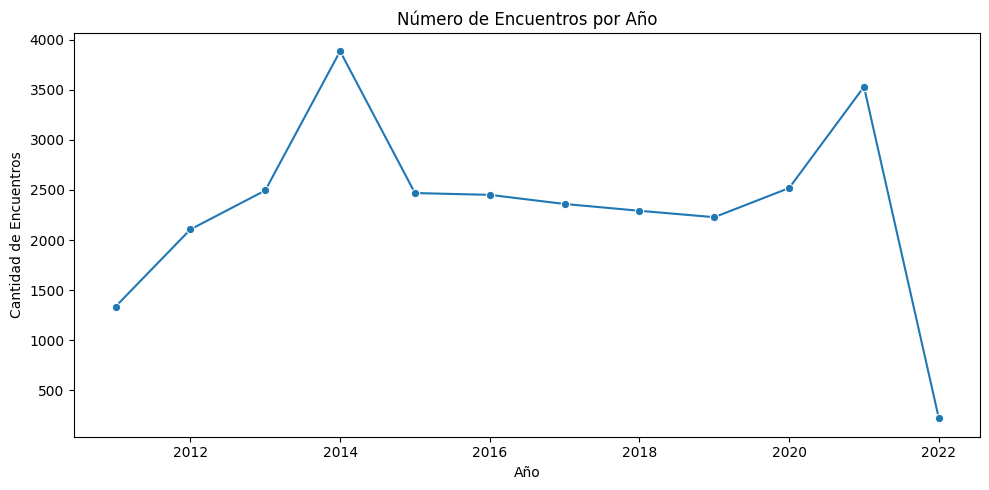

In [136]:
# 🔍 Variable: Análisis Número de Encuentros por Año

# Extraer año y mes
df_encounters['YEAR'] = df_encounters['START'].dt.year
df_encounters['MONTH'] = df_encounters['START'].dt.month

# Encuentros por año
year_counts = df_encounters['YEAR'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Número de Encuentros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Encuentros')
plt.tight_layout()
plt.show()


#### 📌 Evolución del Número de Encuentros Médicos por Año

El gráfico muestra la cantidad de encuentros médicos registrados por año entre 2011 y 2022.

**🔍Hallazgos:**
- Se observa un crecimiento sostenido entre 2011 y 2014, alcanzando el máximo en 2014.

- A partir de 2015 hasta 2019, se presenta una tendencia a la baja, con una reducción progresiva en la cantidad de encuentros.

- En 2020 y 2021, se observa una recuperación importante, posiblemente tras la primera fase de la pandemia.

- En 2022, se registra una caída abrupta, probablemente relacionada con un corte en la recolección de datos y no con una disminución real en la actividad médica.

**✍️Recomendación:**
- El hospital o sistema de salud debe estar preparado para fluctuaciones en la demanda, especialmente en situaciones externas como pandemias.

- Se sugiere investigar el motivo del descenso sostenido entre 2015 y 2019, así como confirmar si el dato de 2022 está completo o requiere revisión.


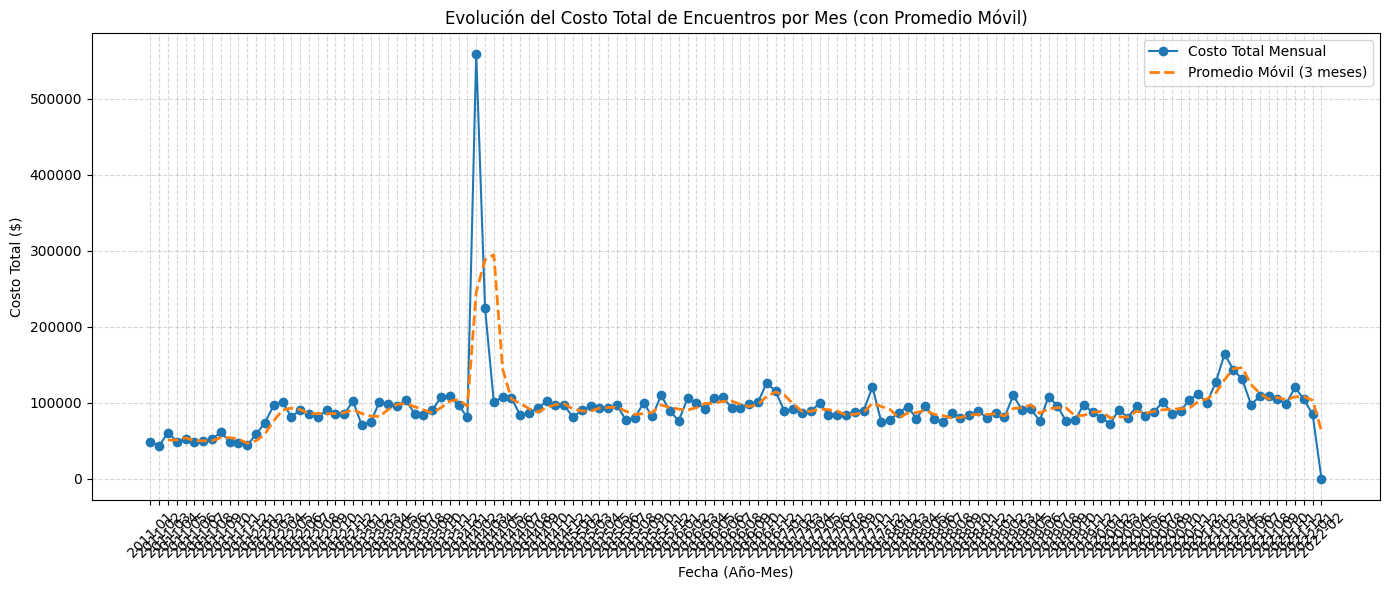

In [137]:
# 🔍 Variable: Análisis Costo Total por Mes (para detectar estacionalidad)

## Evolución del Costo Total de Encuentros por Mes (con Promedio Móvil)

# Asegurarse de que la fecha esté en formato datetime
df_encounters['START'] = pd.to_datetime(df_encounters['START'])

# Crear columna YEAR_MONTH en formato 'YYYY-MM'
df_encounters['START'] = df_encounters['START'].dt.tz_localize(None)
df_encounters['YEAR_MONTH'] = df_encounters['START'].dt.to_period('M').astype(str)

# Agrupar y sumar el costo total por mes
monthly_cost = df_encounters.groupby('YEAR_MONTH')['TOTAL_CLAIM_COST'].sum()

# Crear promedio móvil de 3 meses
monthly_cost_rolling = monthly_cost.rolling(window=3).mean()

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(monthly_cost.index, monthly_cost.values, label='Costo Total Mensual', marker='o')
plt.plot(monthly_cost.index, monthly_cost_rolling, label='Promedio Móvil (3 meses)', linestyle='--', linewidth=2)
plt.title('Evolución del Costo Total de Encuentros por Mes (con Promedio Móvil)')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Costo Total ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 📌 Evolución del Costo Total de Encuentros por Mes (con Promedio Móvil)

El gráfico presenta la evolución mensual del costo total de los encuentros médicos, desde el inicio del registro hasta la fecha más reciente.

**🔍Hallazgos:**

  - *Tendencia General Estable:* A lo largo del período, el costo total mensual se mantiene relativamente estable, con ligeras variaciones y una tendencia moderadamente creciente en los últimos años.

  - *Pico Irregular Significativo:* Se observa un pico excepcional en un mes puntual, con un valor superior a los $500.000, lo cual rompe el patrón normal y afecta momentáneamente la curva de tendencia. Este valor debe ser investigado, ya que puede deberse a:

    * Un procedimiento médico de altísimo costo,

    * Un error de carga o duplicación de datos,

    * Un evento extraordinario (ej.: subsidios o campañas masivas).

  - *Caída Abrupta Reciente:* En los últimos meses se presenta una disminución drástica del costo total, lo cual probablemente no refleja una disminución real, sino que indica datos incompletos o un corte en la carga de información reciente.



***🔶🔶 ANÁLISIS GEOGRÁFICO***

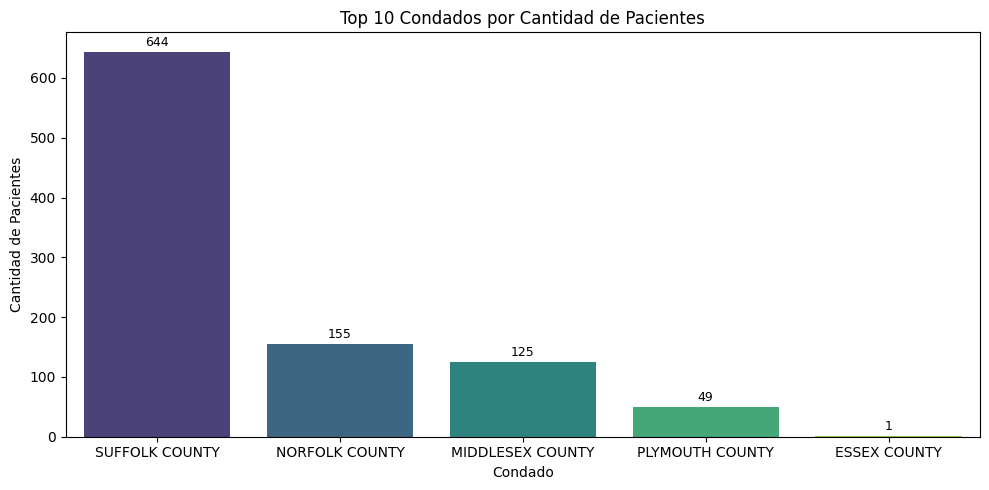

In [138]:
# 🔍 Variable: Análisis Distribución de Pacientes por Condado

# Obtener los 10 condados con más pacientes
county_counts = df_patients['COUNTY'].value_counts().head(10)

# Gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=county_counts.index,
    y=county_counts.values,
    hue=county_counts.index,
    palette='viridis',
    legend=False
)

# Agregar etiquetas de cantidad sobre cada barra
for i, value in enumerate(county_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Condados por Cantidad de Pacientes')
plt.xlabel('Condado')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()



#### 📍 Distribución de Pacientes por Condado

El análisis muestra la distribución geográfica de los pacientes según su condado de residencia, permitiendo identificar áreas clave de influencia para el hospital.

**🧠 Hallazgos destacados:**

- El Condado de Suffolk concentra la mayoría de los pacientes (644 registros), representando por sí solo más del 60% de la base de pacientes analizada.
- Condados como Plymouth y Essex tienen una participación muy baja en el total, con solo 49 y 1 pacientes respectivamente.

**✨Insight:**
- Existe una concentración geográfica evidente, lo que sugiere que el hospital tiene una presencia territorial fuerte en uno o pocos condados.
- La dependencia excesiva de una sola región podría representar una vulnerabilidad o una oportunidad de expansión hacia otras zonas.

**✍️Recomendación:**
- Reforzar la cobertura y los servicios ofrecidos en el Condado de Suffolk, ya que representa la base principal de pacientes.
- Analizar el perfil de pacientes en los condados de menor participación para identificar barreras (distancia, falta de convenios, poca promoción).
- Explorar la expansión de servicios o marketing en condados cercanos como Norfolk y Middlesex, que ya presentan una base moderada y podrían crecer.
- Monitorear tendencias geográficas con el tiempo para anticipar cambios en la demanda por región.


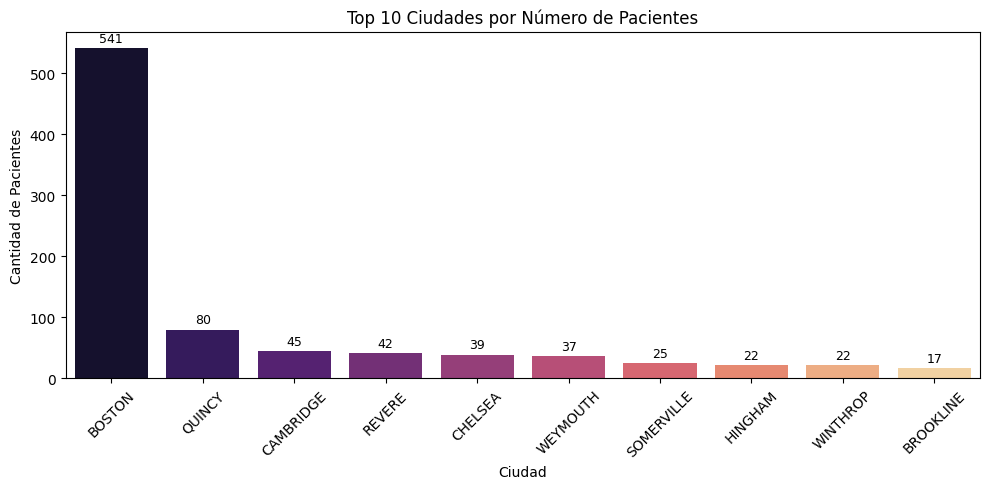

In [139]:
# 🔍 Variable: Análisis Distribución por Ciudad

# Obtener las 10 ciudades con más pacientes
city_counts = df_patients['CITY'].value_counts().head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=city_counts.index,
    y=city_counts.values,
    hue=city_counts.index,
    palette='magma',
    legend=False
)

# Agregar etiquetas con los valores encima de cada barra
for i, value in enumerate(city_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Ciudades por Número de Pacientes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🏙️ Distribución de Pacientes por Ciudad

Este gráfico presenta las 10 ciudades con mayor número de pacientes registrados en el hospital, permitiendo analizar la presencia urbana y las oportunidades de expansión territorial.

**🧠 Hallazgos Clave:**

- Boston concentra de forma contundente la mayoría de los pacientes (541 personas), representando más del 50% del total.
- Las últimas ciudades del top 10 tienen menos de 25 pacientes, lo cual muestra una gran asimetría en la distribución geográfica urbana.

**✨ Insight:**

- El hospital tiene una fuerte concentración de pacientes en la ciudad de Boston, lo que probablemente coincide con su ubicación física principal.
- El resto de las ciudades presentan una base de pacientes significativamente menor, lo que podría reflejar falta de alcance, promoción o convenios locales.

**✍️ Recomendaciones para el hospital:**

- Consolidar la presencia en Boston, asegurando cobertura médica eficiente y rápida atención para la mayoría de su población atendida.
- Evaluar estrategias de marketing, alianzas o extensión de servicios en ciudades cercanas como Quincy, Cambridge y Revere, donde ya existe una base moderada de pacientes.
- Investigar las causas de baja participación en otras ciudades (por ejemplo, accesibilidad, transporte, preferencia por otros centros de salud).

# **✅ MODELO PREDICTIVO**

***🔶🔶 MÉTODO DE REGRESIÓN LINEAL***

# Regresión del Costo Médico

## 🎯 Objetivo

- Predecir el costo total del encuentro médico (`TOTAL_CLAIM_COST`) a partir de características del paciente, del encuentro y de la aseguradora.

In [140]:
# ✅ Paso 1: Selección y preparación de variables

# Copia del df_encounters
df_model = df_encounters.copy()

# Agregar el nombre de la aseguradora (merge con df_payers)
df_model = df_model.merge(df_payers[['Id', 'NAME']], left_on='PAYER', right_on='Id', how='left')
df_model.rename(columns={'NAME': 'PAYER_NAME'}, inplace=True)

# Seleccionamos variables de interés
variables = ['AGE', 'DURATION_DAYS', 'ENCOUNTERCLASS', 'PAYER_NAME']

# Filtramos columnas necesarias + target
df_model = df_model[variables + ['TOTAL_CLAIM_COST']].dropna()

# One-Hot Encoding para variables categóricas
df_model_encoded = pd.get_dummies(df_model, columns=['ENCOUNTERCLASS', 'PAYER_NAME'], drop_first=True)

# Separar X e y
X = df_model_encoded.drop('TOTAL_CLAIM_COST', axis=1)
y = df_model_encoded['TOTAL_CLAIM_COST']


📊 R² (coef. determinación): 0.14
📉 MSE (error cuadrático medio): 230858.13


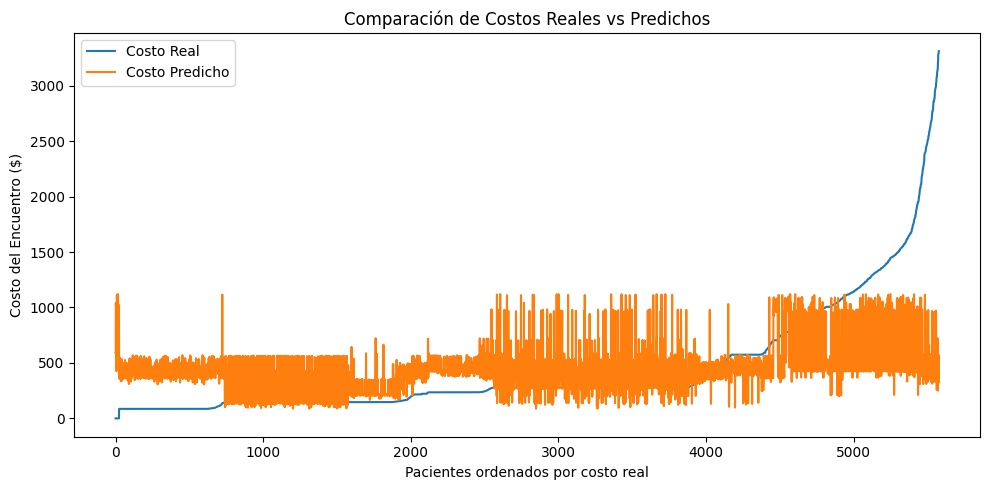

In [141]:
# ✅ Paso 2: División de datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# ✅ Paso 3: Modelo de Regresión Lineal

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"📊 R² (coef. determinación): {r2:.2f}")
print(f"📉 MSE (error cuadrático medio): {mse:.2f}")



# ✅ Paso 4 : Predicciones ordenadas (gráfico de línea)

# Ordenar por costo real
orden = np.argsort(y_test.values)
y_real_ordenado = y_test.values[orden]
y_pred_ordenado = y_pred[orden]

plt.figure(figsize=(10, 5))
plt.plot(y_real_ordenado, label='Costo Real')
plt.plot(y_pred_ordenado, label='Costo Predicho')
plt.title('Comparación de Costos Reales vs Predichos')
plt.xlabel('Pacientes ordenados por costo real')
plt.ylabel('Costo del Encuentro ($)')
plt.legend()
plt.tight_layout()
plt.show()

### 📊 Interpretación del Modelo de Regresión Lineal: Predicción del Costo Total del Encuentro

#### ⚙️ Características del modelo:
- Se utilizó **Regresión Lineal** como modelo base, por su interpretabilidad.
- Las variables categóricas (`ENCOUNTERCLASS` y `PAYER_NAME`) fueron transformadas con codificación *one-hot*.
- El conjunto de datos fue dividido en 80% entrenamiento y 20% prueba para evitar sobreajuste.

#### 📈 Resultados obtenidos:
- **R² (coeficiente de determinación)**: `0.14`. El modelo solo explica el 14% de la variabilidad en los costos, lo que indica un bajo poder predictivo. Esto sugiere que existen otros factores no contemplados que influyen significativamente en el costo médico.
- **MSE (error cuadrático medio)**: `$230,858.13`. Un error cuadrático medio elevado indica que, en promedio, las predicciones difieren notablemente de los costos reales. Esto se agrava en los casos de costos extremos o encuentros hospitalarios prolongados.

#### 📉 Análisis del gráfico:
La gráfica muestra:

- Una línea azul que representa el costo real, ordenado de menor a mayor (se puede ver una curva creciente clara).
- Una línea naranja (irregular y plana), que representa el costo predicho, la cual oscila sin seguir la forma real del costo.

Esto indica que:

- El modelo predice un rango estrecho y constante de costos, sin adaptarse bien a valores bajos ni altos.
- No capta bien los outliers, ni las diferencias reales en función de duración, tipo de encuentro o aseguradora.
- El modelo subestima severamente los costos más altos y no distingue entre pacientes de bajo o alto costo.

Causas posibles:

- Uso de un modelo lineal en un problema probablemente no lineal.
- Falta de variables relevantes: no se incluyeron procedimientos, organización, motivo del encuentro, etc.
- Alta presencia de outliers y distribución sesgada del costo médico.

#### ✅ Recomendaciones al hospital:
- Usar este modelo como base para **estimar costos** de nuevos pacientes de forma anticipada.
- **Monitorear aseguradoras** que sistemáticamente se asocian a costos elevados.
- Implementar herramientas automáticas de predicción de costos para **gestión financiera, auditoría y prevención de sobrecostos**.


# 🧾 **CONCLUSIÓN FINAL DEL PROYECTO**

Este proyecto ha representado un ejercicio integral de análisis de datos aplicado al sector hospitalario, abarcando todas las fases de un proceso analítico profesional: desde la exploración y limpieza de datos, hasta la construcción de modelos predictivos y la generación de recomendaciones accionables.


## 📌 **Resumen General del Análisis**
- Se integraron múltiples fuentes de datos relacionados con pacientes, procedimientos, aseguradoras, organizaciones y encuentros médicos.
- Se realizó una **limpieza exhaustiva**, detectando y tratando valores nulos, formatos inconsistentes y outliers clínicos y financieros.
- El análisis exploratorio (EDA) reveló **patrones importantes** sobre la duración, costo y causas de los encuentros médicos, con insights diferenciados por aseguradora, tipo de encuentro y ubicación geográfica.
- Se construyó un modelo de **regresión lineal** con variables enriquecidas. Aunque el R² fue bajo, el modelo ayudó a evidenciar qué factores más afectan los costos.
- Se aplicaron análisis bivariados y multivariados para descubrir **asociaciones entre edad, duración, costo, tipo de procedimiento y geografía**.

## 🔍 **Hallazgos Más Relevantes**
- El **tipo de encuentro** y la **aseguradora** son los principales impulsores del costo médico.
- Existen procedimientos altamente costosos con duración breve, lo que indica que **el tipo de tratamiento importa más que la duración en muchos casos**.
- La mayoría de los pacientes se concentran en ciertos condados y ciudades, y los costos varían significativamente según la región.
- Algunas aseguradoras, como *PAYER_7caa...*, cubren procedimientos de mayor costo en promedio, lo cual tiene implicancias administrativas y financieras importantes para el hospital.

## 💡 **Insights y Recomendaciones al Hospital**
1. **Monitorear de cerca los procedimientos de alto costo**, especialmente los que aparecen repetidamente en las aseguradoras más caras.
2. **Establecer políticas diferenciadas por aseguradora**, basadas en patrones de uso y costos promedios.
3. **Reducir la duración innecesaria de internaciones**, sin afectar la calidad de atención, podría generar un ahorro considerable.
4. **Ampliar la capacidad analítica del hospital**, incorporando nuevas fuentes de datos clínicos y desarrollando modelos más robustos (árboles de decisión, clustering, etc.).
5. **Monitorear estacionalidad y picos de demanda por mes**, para optimizar recursos humanos y materiales.



---

## ✅ Checklist Final del Proyecto

- [x] Carga de datos
- [x] Limpieza y transformación
- [x] EDA completo (uni, bi, multivariado)
- [x] Análisis temporal y geográfico
- [x] Respuesta a preguntas clave de negocio
- [x] Modelo de regresión y evaluación
- [x] Insights y recomendaciones
- [x] Integración de variables desde múltiples datasets
- [x] Gráficos con interpretaciones
- [x] Notebook limpio, estructurado y documentado
- [x] Conclusión Final

---

**🔗 Dashboard en Power BI:** *Disponible para consulta con las visualizaciones finales e interactivas del análisis.
